In [1]:
!pip install cenpy
!pip install python-Levenshtein

In [2]:
#Foundational libraries
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import geopandas as gp
import cenpy as cen
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

/opt/conda/lib/python3.8/site-packages/cenpy/remote.py:224: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if index is not "":
/opt/conda/lib/python3.8/site-packages/cenpy/tiger.py:186: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if kwargs.get("returnGeometry", "true") is "false":


In [5]:
Baltimore = gp.read_file("Baltimore.geojson")

In [6]:
Baltimore.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 95615 entries, 0 to 95614
Columns: 133 entries, OBJECTID to geometry
dtypes: float64(8), geometry(1), int64(19), object(105)
memory usage: 97.0+ MB


In [7]:
Properties = gp.read_file('Baltimore.geojson')

In [8]:
Res = (Properties['DESCLU'] == 'Residential') #We only want residential data

In [9]:
Res.head()

0    True
1    True
2    True
3    True
4    True
Name: DESCLU, dtype: bool

In [10]:
Baltimore = Baltimore[Res] #Data filtered

In [11]:
Baltimore.info() #More than twenty thousand data eliminated

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 73721 entries, 0 to 95614
Columns: 133 entries, OBJECTID to geometry
dtypes: float64(8), geometry(1), int64(19), object(105)
memory usage: 75.4+ MB


In [12]:
I83 = gp.read_file('I83_C.geojson')

In [13]:
Baltimore = Baltimore.to_crs(epsg=32618)

In [14]:
I83 = I83.to_crs(epsg=32618)

In [15]:
min_feature = []
min_geom = []
min_dist = []
for row in Baltimore.iterrows():
    dists = I83.distance(row[-1].geometry)
    min_geom.append(Baltimore.iloc[dists[dists == dists.min()].index].geometry)
    min_feature.append(Baltimore.iloc[dists[dists == dists.min()].index].index[0])
    min_dist.append(dists.min())
Baltimore['near_feature'] = min_feature
Baltimore['near_geom'] = min_geom
Baltimore['near_dist'] = min_dist

In [16]:
Baltimore.head()

OBJECTID JURSCODE           ACCTID  DIGXCORD  DIGYCORD       CT2010  \
0    114009     ANNE  020320590101569  440891.9  166448.6  24003730100   
1    216264     ANNE  020504712558005  433089.4  174164.2  24003750102   
2    259783     BACI   0301011738 001  435607.3  180454.0  24510010500   
3    259784     BACI   0301011738 002  435612.6  180454.7  24510010500   
4    259785     BACI   0301011738 003  435617.9  180455.0  24510010500   

         BG2010 GEOGCODE OOI RESITYP  ... MDPVDATE         LEGAL3 HOMQLCOD  \
0  240037301002       80   N      SF  ...  2019APR     CLEARWATER            
1  240037501021       81   N      SF  ...  2019APR  BROOKLYN PARK            
2  245100105001       82   H      SF  ...  2021APR                       A   
3  245100105001       82   H      SF  ...  2021APR                       A   
4  245100105001       82   H      SF  ...  2021APR                       A   

  RESIDENT NFMTTLVL SDATDATE                    geometry near_feature  \
0        0     3800  2021AUG  POINT (-76.52683 39.16518)            0   
1        0    20000  2021AUG  POINT (-76.61674 39.23501)            0   
2        1   751900  2021AUG  POINT (-76.58725 39.29157)            0   
3        1   553600  2021AUG  POINT (-76.58719 39.29157)            0   
4        1   478300  2021AUG  POINT (-76.58712 39.29158)            0   

                                           near_geom near_dist  
0  0    POINT (-76.52683 39.16518)
Name: geometry...  0.142734  
1  0    POINT (-76.52683 39.16518)
Name: geometry...  0.051765  
2  0    POINT (-76.52683 39.16518)
Name: geometry...  0.017983  
3  0    POINT (-76.52683 39.16518)
Name: geometry...  0.018043  
4  0    POINT (-76.52683 39.16518)
Name: geometry...  0.018102  

[5 rows x 136 columns]

In [17]:
Test = Baltimore.near_geom

In [18]:
Test.tail()

95610    0    POINT (-76.52683 39.16518)
Name: geometry...
95611    0    POINT (-76.52683 39.16518)
Name: geometry...
95612    0    POINT (-76.52683 39.16518)
Name: geometry...
95613    0    POINT (-76.52683 39.16518)
Name: geometry...
95614    0    POINT (-76.52683 39.16518)
Name: geometry...
Name: near_geom, dtype: object

<AxesSubplot:>

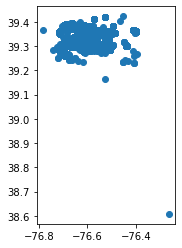

In [24]:
Baltimore.plot()

In [25]:
#As we can see some parcels are out of boundaries

In [26]:
Bal = (Properties['JURSCODE'] == 'BACI') 

In [27]:
Baltimore = Baltimore[Bal]

/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:1299: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)


<AxesSubplot:>

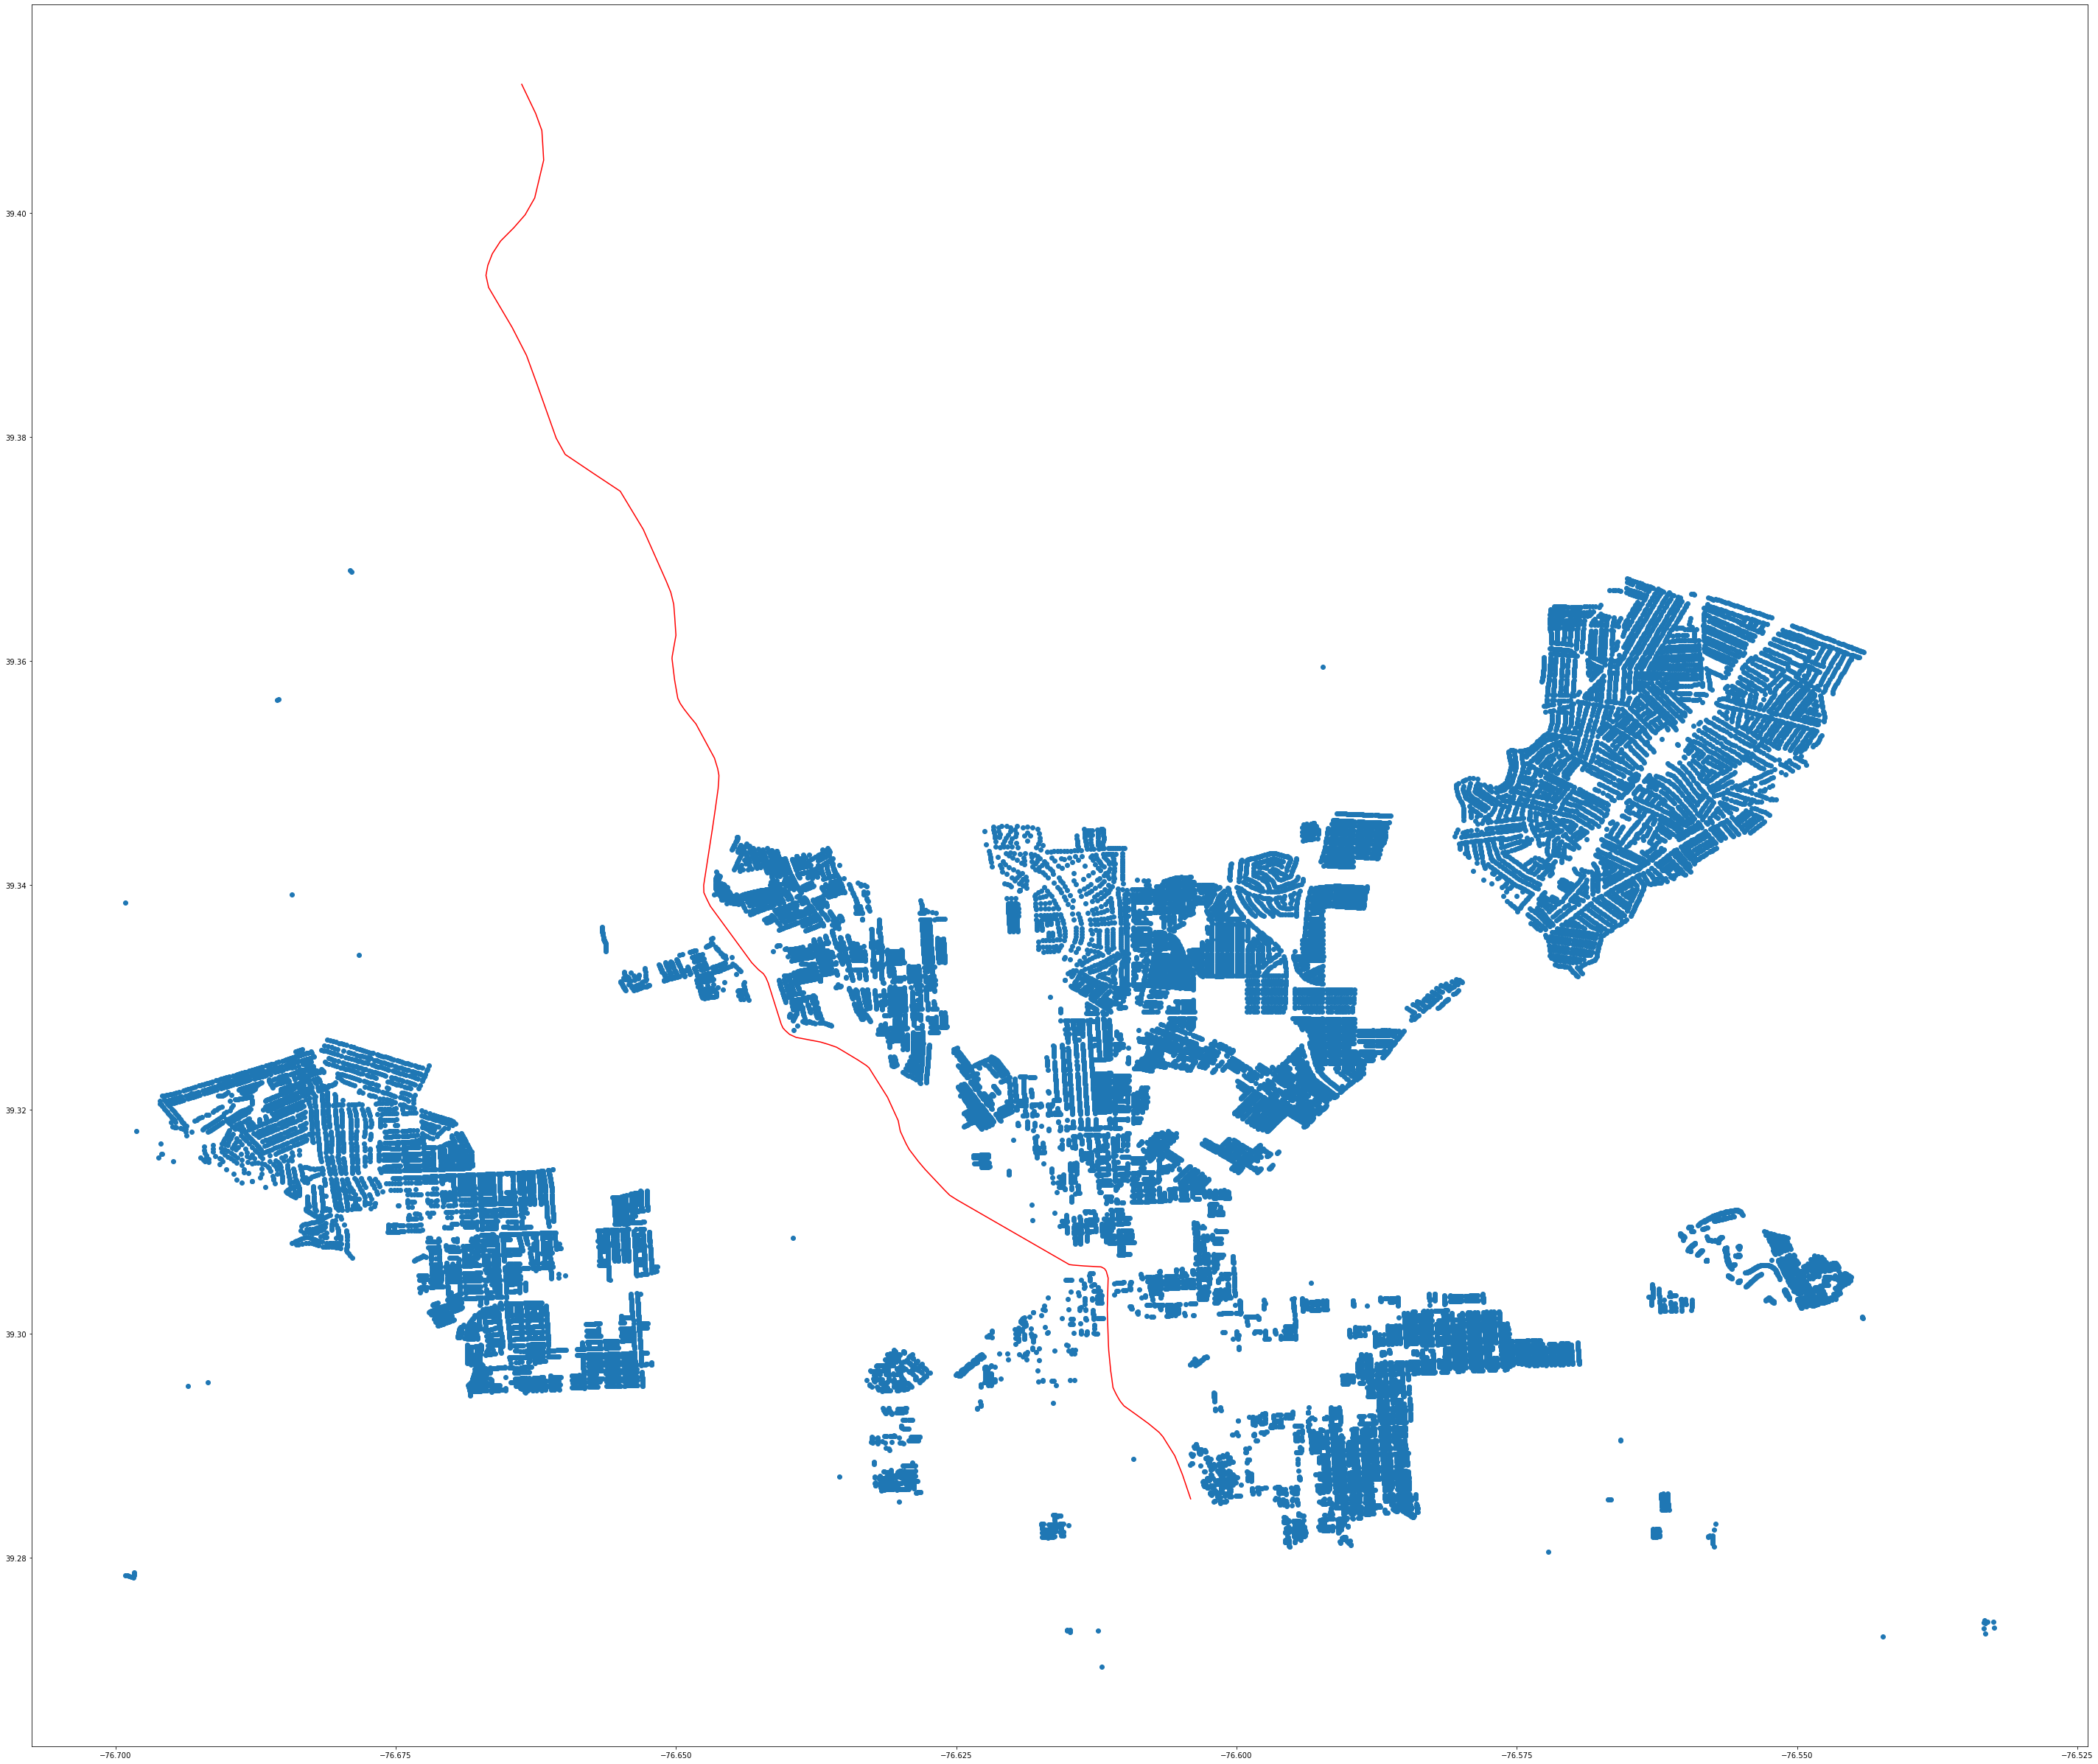

In [28]:
fig, ax = plt.subplots(figsize = (50,50))
Baltimore.plot(ax=ax)
I83.plot(ax=ax, color='r')

/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


<AxesSubplot:>

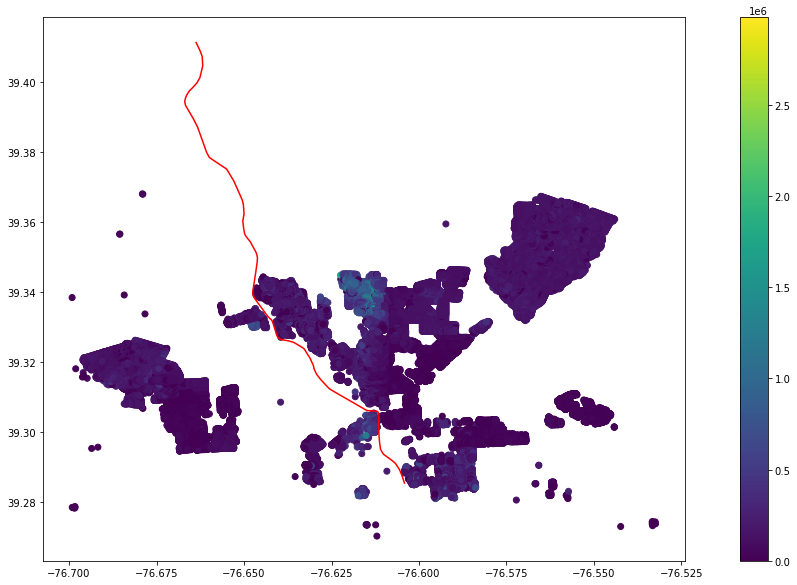

In [29]:
Baltimore['NFMTTLVL'] = Baltimore['NFMTTLVL'].astype(float)
fig, ax = plt.subplots(figsize=(20,10))
Baltimore.plot('NFMTTLVL', legend=True, ax=ax)
I83.plot(ax=ax, color='r')

In [30]:
from sklearn import cluster

In [31]:
kmeans5 = cluster.KMeans(n_clusters=5)

In [32]:
kmeans5

KMeans(n_clusters=5)

In [33]:
y = Baltimore['NFMTTLVL'].values.reshape((-1,1))

In [34]:
np.random.seed(1234)
k5cls = kmeans5.fit(y)

In [35]:
k5cls.labels_

array([3, 4, 4, ..., 1, 0, 0], dtype=int32)

In [36]:
Baltimore['k5cls'] = k5cls.labels_

/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


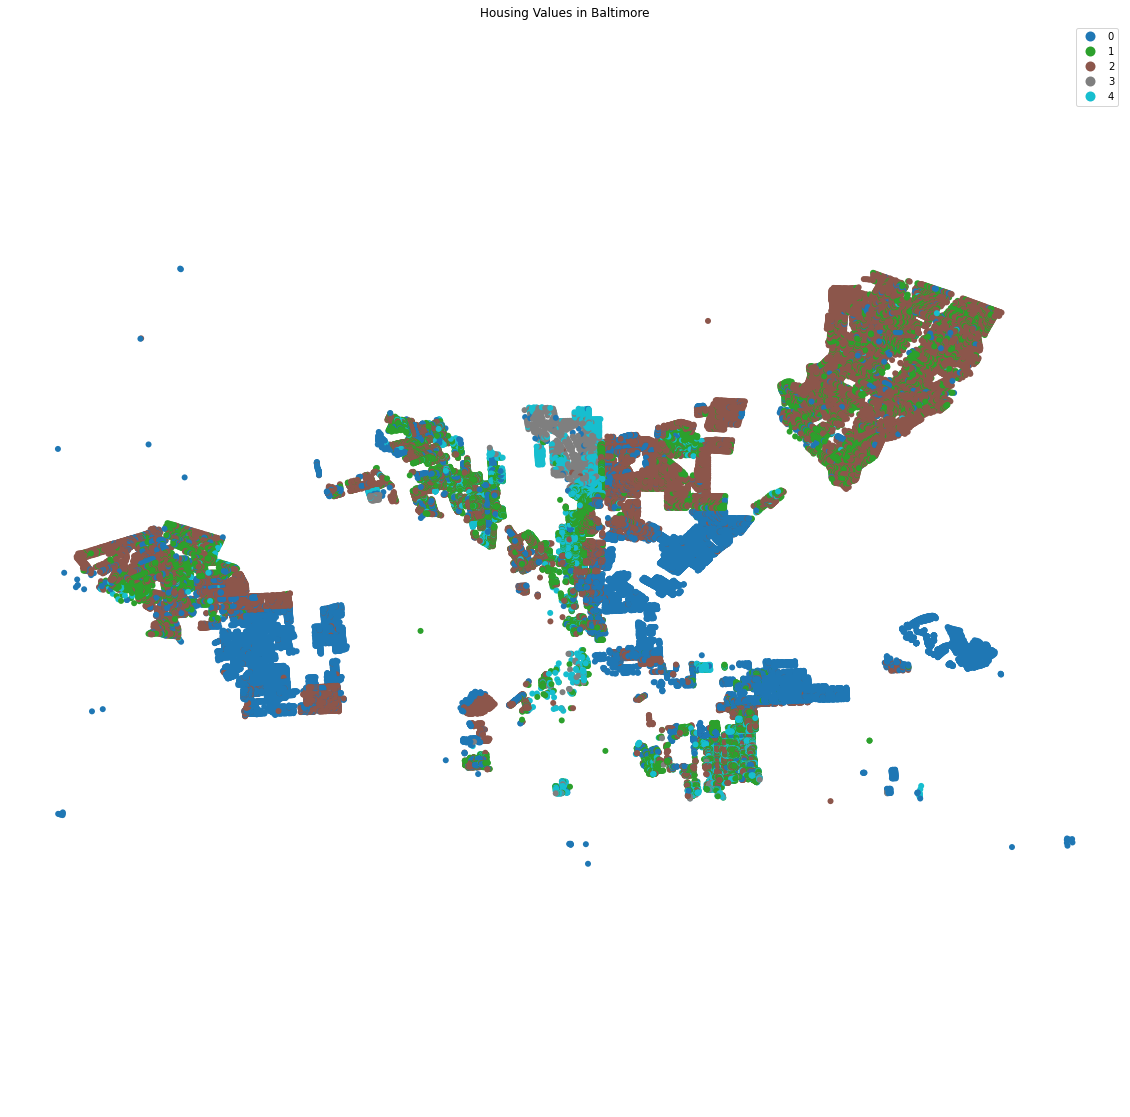

In [37]:
f, ax = plt.subplots(1, figsize=(20, 20))
Baltimore.plot(column='k5cls', categorical=True, legend=True, linewidth=0, ax=ax)
ax.set_axis_off()
plt.axis('equal')
plt.title('Housing Values in Baltimore')
# Display the map
plt.show()

In [38]:
k5means = Baltimore.groupby('k5cls')['NFMTTLVL'].mean()
k5means.T

k5cls
0     30142.935362
1    220069.915672
2    130824.383653
3    755588.080808
4    368452.119785
Name: NFMTTLVL, dtype: float64

In [39]:
x = Baltimore['near_dist']

In [114]:
names = ['near_dist']
codes = ['NFMTTLVL']

y = Baltimore[names].values.reshape((-1,1))
x = Baltimore[codes].values.reshape((-1,1))

In [40]:
import spreg
import libpysal.weights as sw

In [56]:
x = Baltimore['near_dist'].values.reshape((-1,1))

In [54]:
x = (x - x.mean(axis=0)) / x.std(axis=0)
y = (y - y.mean(axis=0)) / y.std(axis=0)

In [58]:
y

array([[-0.56550585],
       [-0.56242051],
       [-0.55939524],
       ...,
       [ 0.9258715 ],
       [ 1.68917198],
       [ 1.6018468 ]])

In [48]:
w = sw.Queen.from_dataframe(Baltimore)

In [50]:
names = ['near_dist']

In [ ]:
x = Baltimore['near_dist'].values.reshape((-1,1))

In [115]:
ols_results = spreg.OLS(x, y, w, spat_diag=True, name_x=names)
print(ols_results.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:       54328
Mean dependent var  : 126269.1798                Number of Variables   :           2
S.D. dependent var  : 114362.4125                Degrees of Freedom    :       54326
R-squared           :      0.0153
Adjusted R-squared  :      0.0153
Sum squared residual:699623727128404.125                F-statistic           :    846.8654
Sigma-square        :12878248483.754                Prob(F-statistic)     :  9.226e-185
S.E. of regression  :  113482.371                Log likelihood        : -709432.567
Sigma-square ML     :12877774391.261                Akaike info criterion : 1418869.134
S.E of regression ML: 113480.2819                Schwarz criterion     : 1418886.939

----------------------------------------------------------------

In [ ]:
print(m1.summary)

In [62]:
Mid_Seg = gp.read_file("Mid2.geojson")

In [63]:
min_feature = []
min_geom = []
min_dist = []
for row in Mid_Seg.iterrows():
    dists = I83.distance(row[-1].geometry)
    min_geom.append(Mid_Seg.iloc[dists[dists == dists.min()].index].geometry)
    min_feature.append(Mid_Seg.iloc[dists[dists == dists.min()].index].index[0])
    min_dist.append(dists.min())
Mid_Seg['near_feature'] = min_feature
Mid_Seg['near_geom'] = min_geom
Mid_Seg['near_dist'] = min_dist

In [64]:
Mid_Seg.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2015 entries, 0 to 2014
Columns: 136 entries, OBJECTID to near_dist
dtypes: float64(9), geometry(1), int64(20), object(106)
memory usage: 2.1+ MB


In [68]:
kmeans2 = cluster.KMeans(n_clusters=2)

In [65]:
y = Mid_Seg['NFMTTLVL'].values.reshape((-1,1))

In [69]:
np.random.seed(1234)
k2cls = kmeans2.fit(y)

In [70]:
k2cls.labels_

array([1, 0, 1, ..., 0, 0, 0], dtype=int32)

In [71]:
Mid_Seg['k2cls'] = k2cls.labels_

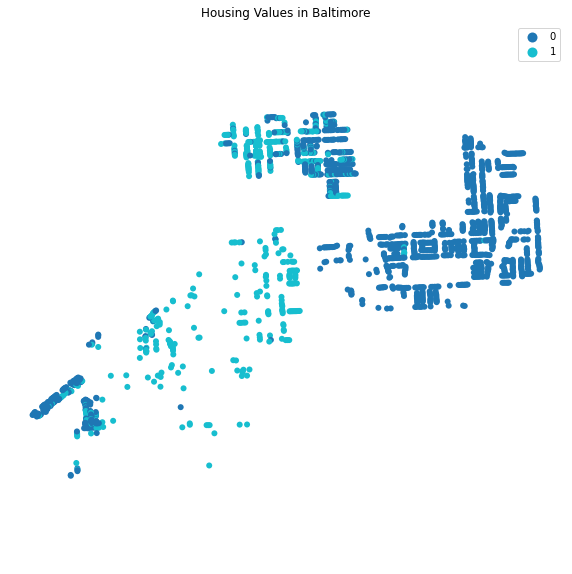

In [416]:
f, ax = plt.subplots(1, figsize=(10, 10))
Mid_Seg.plot(column='k2cls', categorical=True, legend=True, linewidth=0, ax=ax)
#I83.plot(ax=ax, color='r')
ax.set_axis_off()
plt.axis('equal')
plt.title('Housing Values in Baltimore')
# Display the map
plt.show()

In [339]:
dups_shape = Mid_Seg.pivot_table(columns=['k2cls'], aggfunc='size')
print(dups_shape)

k2cls
0    1496
1     519
dtype: int64


In [419]:
k5means = Mid_Seg.groupby('k2cls')['NFMTTLVL'].mean()
k5means.T

k2cls
0     52057.620321
1    296454.913295
Name: NFMTTLVL, dtype: float64

In [127]:
names = ['near_dist']
codes = ['NFMTTLVL']

y = Mid_Seg[names].values.reshape((-1,1))
x = Mid_Seg[codes].values.reshape((-1,1))

In [83]:
w = sw.Queen.from_dataframe(Baltimore)

In [82]:
Baltimore.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 54328 entries, 2 to 72253
Columns: 137 entries, OBJECTID to k5cls
dtypes: float64(10), geometry(1), int32(1), int64(19), object(106)
memory usage: 57.0+ MB


In [89]:
Mid_Seg['NFMTTLVL'].head()

0    200000
1     85200
2    200000
3     85200
4    125000
Name: NFMTTLVL, dtype: int64

In [95]:
m1 = spreg.OLS(
    # Dependent variable
    y, 
    # Independent variables
    x
)

In [96]:
m1.summary

'REGRESSION\n----------\nSUMMARY OF OUTPUT: ORDINARY LEAST SQUARES\n-----------------------------------------\nData set            :     unknown\nWeights matrix      :        None\nDependent Variable  :     dep_var                Number of Observations:        2015\nMean dependent var  :      0.0065                Number of Variables   :           2\nS.D. dependent var  :      0.0033                Degrees of Freedom    :        2013\nR-squared           :      0.1206\nAdjusted R-squared  :      0.1202\nSum squared residual:       0.020                F-statistic           :    276.1674\nSigma-square        :       0.000                Prob(F-statistic)     :   3.243e-58\nS.E. of regression  :       0.003                Log likelihood        :    8755.576\nSigma-square ML     :       0.000                Akaike info criterion :  -17507.153\nS.E of regression ML:      0.0031                Schwarz criterion     :  -17495.936\n\n-----------------------------------------------------------

In [99]:
Mid = gp.read_file('Baltimore.geojson')

In [124]:
Midtown = gp.read_file("Mid3.geojson")

In [125]:
min_feature = []
min_geom = []
min_dist = []
for row in Midtown.iterrows():
    dists = I83.distance(row[-1].geometry)
    min_geom.append(Midtown.iloc[dists[dists == dists.min()].index].geometry)
    min_feature.append(Midtown.iloc[dists[dists == dists.min()].index].index[0])
    min_dist.append(dists.min())
Midtown['near_feature'] = min_feature
Midtown['near_geom'] = min_geom
Midtown['near_dist'] = min_dist

In [126]:
w = sw.Queen.from_dataframe(Midtown)

In [102]:
Mid_Seg.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2015 entries, 0 to 2014
Columns: 137 entries, OBJECTID to k2cls
dtypes: float64(9), geometry(1), int32(1), int64(20), object(106)
memory usage: 2.1+ MB


In [128]:
ols_results = spreg.OLS(x, y, w, spat_diag=True, name_x=names)
print(ols_results.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :     dep_var                Number of Observations:        2015
Mean dependent var  : 115006.6005                Number of Variables   :           2
S.D. dependent var  : 131329.2038                Degrees of Freedom    :        2013
R-squared           :      0.1206
Adjusted R-squared  :      0.1202
Sum squared residual:30545575744461.355                F-statistic           :    276.1674
Sigma-square        :15174155859.146                Prob(F-statistic)     :   3.243e-58
S.E. of regression  :  123183.424                Log likelihood        :  -26476.842
Sigma-square ML     :15159094662.264                Akaike info criterion :   52957.683
S.E of regression ML: 123122.2752                Schwarz criterion     :   52968.900

-----------------------------------------------------------------

In [132]:
Values = ['NFMTTLVL']

In [159]:
# Name (index) the rows after the category they belong
to_plot = Mid_Seg.set_index('k2cls')
# Subset to keep only variables used in K-means clustering
to_plot = to_plot[Values]
# Display top of the table
to_plot.head()

NFMTTLVL
k2cls          
1        200000
0         85200
1        200000
0         85200
0        125000

In [160]:
to_plot = to_plot.stack()
to_plot.head()

k2cls          
1      NFMTTLVL    200000
0      NFMTTLVL     85200
1      NFMTTLVL    200000
0      NFMTTLVL     85200
       NFMTTLVL    125000
dtype: int64

In [161]:
to_plot = to_plot.reset_index()
to_plot.head()

k2cls   level_1       0
0      1  NFMTTLVL  200000
1      0  NFMTTLVL   85200
2      1  NFMTTLVL  200000
3      0  NFMTTLVL   85200
4      0  NFMTTLVL  125000

In [140]:
import seaborn as sns

In [162]:
to_plot = to_plot.rename(columns={'level_1': 'Name', 0: 'Values'})
to_plot.head()

k2cls      Name  Values
0      1  NFMTTLVL  200000
1      0  NFMTTLVL   85200
2      1  NFMTTLVL  200000
3      0  NFMTTLVL   85200
4      0  NFMTTLVL  125000

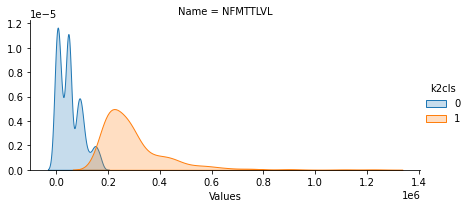

In [164]:
# Setup the facets
facets = sns.FacetGrid(data=to_plot, row='Name', hue='k2cls', \
                  sharey=False, sharex=False, aspect=2)
# Build the plot as a `sns.kdeplot`
_ = facets.map(sns.kdeplot, 'Values', shade=True).add_legend()

In [166]:
Orley = gp.read_file('NewOrleans.geojson')

In [167]:
kmeans5 = cluster.KMeans(n_clusters=5)

In [175]:
orley = Orley.dropna(subset=['Current_Assessed_Value'])

In [176]:
orley.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 126821 entries, 0 to 160815
Data columns (total 65 columns):
 #   Column                                Non-Null Count   Dtype   
---  ------                                --------------   -----   
 0   fid                                   126821 non-null  int64   
 1   First_Owner_Name                      126821 non-null  object  
 2   Tax_District_Code                     0 non-null       object  
 3   Postal_State                          126757 non-null  object  
 4   BLOCK                                 126491 non-null  object  
 5   Lot                                   121474 non-null  object  
 6   Postal_Address                        126815 non-null  object  
 7   Property_Class                        0 non-null       object  
 8   Current_Summer_Taxes_Owed             0 non-null       object  
 9   Previous_Taxable_Value                0 non-null       object  
 10  SITUS_Direction                       11372 non-

In [177]:
y = orley['Current_Assessed_Value'].values.reshape((-1,1))

In [178]:
np.random.seed(233)
k5cls = kmeans5.fit(y)

In [180]:
k5cls.labels_

array([0, 0, 0, ..., 0, 4, 0], dtype=int32)

In [181]:
orley['k5cls'] = k5cls.labels_

/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


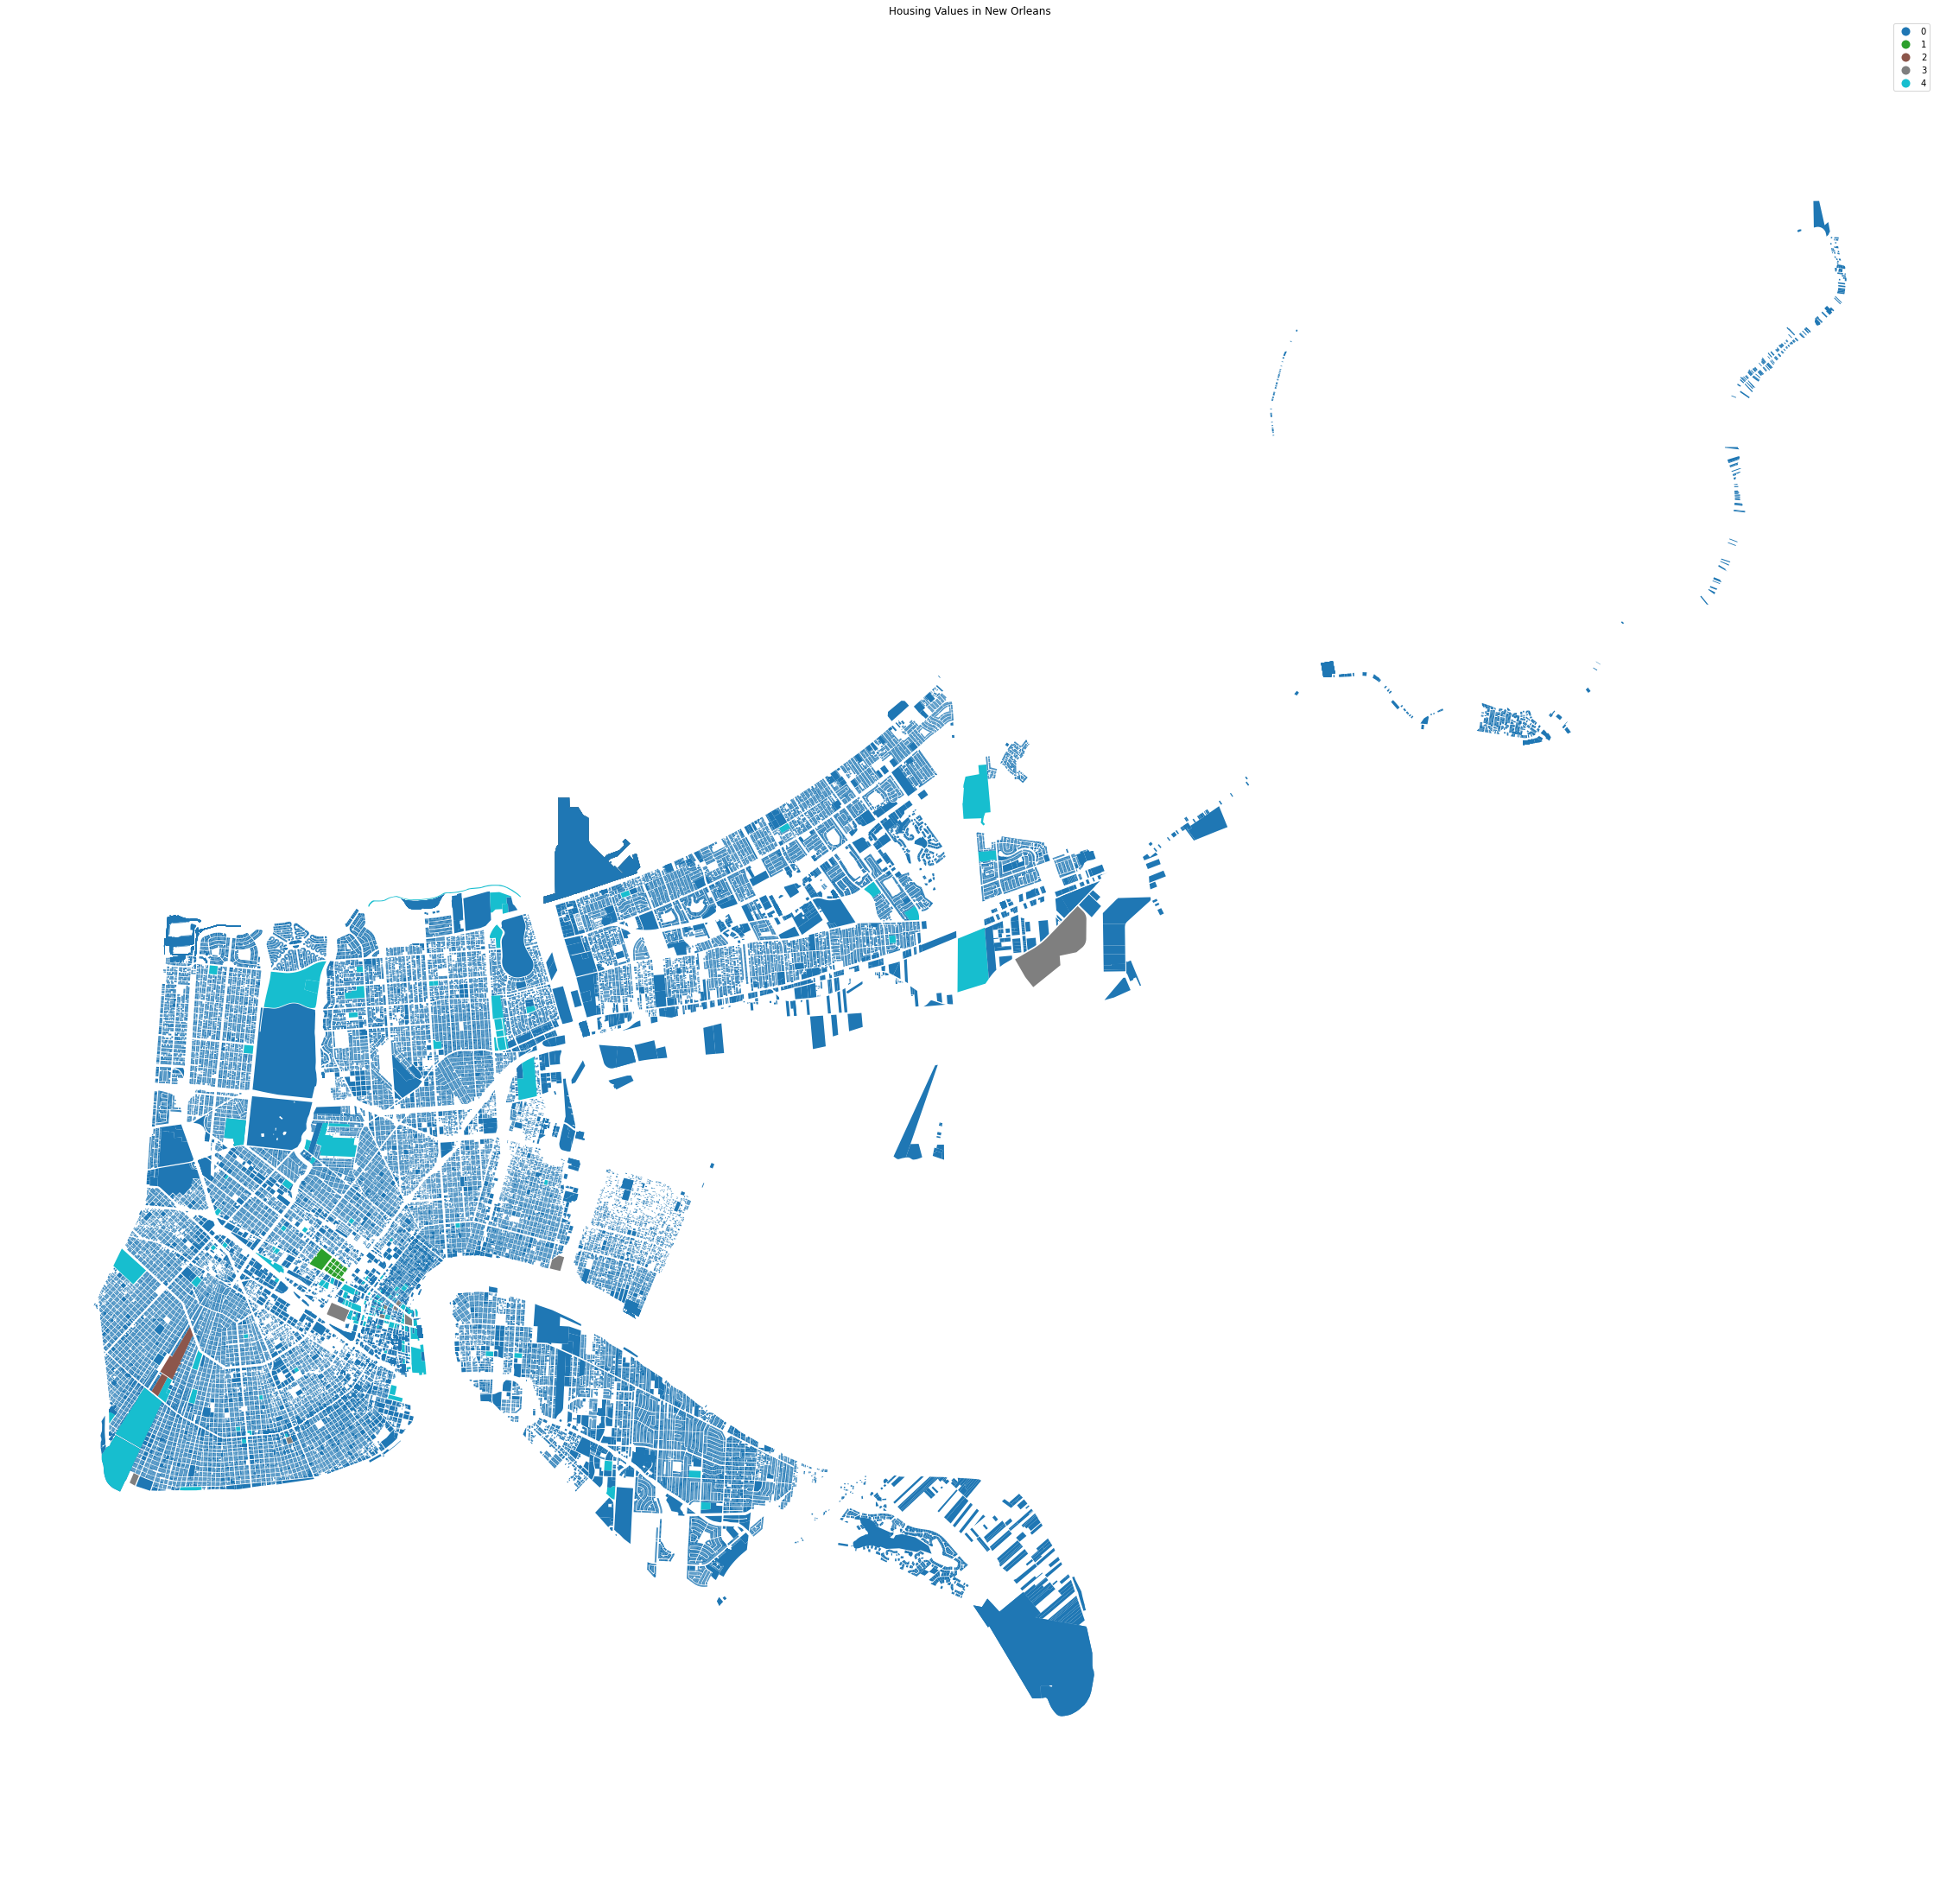

In [184]:
f, ax = plt.subplots(1, figsize=(40, 40))
orley.plot(column='k5cls', categorical=True, legend=True, linewidth=0, ax=ax)
ax.set_axis_off()
plt.axis('equal')
plt.title('Housing Values in New Orleans')
# Display the map
plt.show()

In [219]:
Orley1000 = gp.read_file('NO1K.geojson')

In [259]:
orley1000 = Orley1000.dropna(subset=['Current_Assessed_Value'])

In [260]:
df3 = orley1000[orley1000['Current_Assessed_Value'] < 1000000]

In [261]:
y = df3['Current_Assessed_Value'].values.reshape((-1,1))

In [262]:
np.random.seed(233)
k2cls = kmeans2.fit(y)

In [263]:
k2cls.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [264]:
df3['k2cls'] = k2cls.labels_

/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


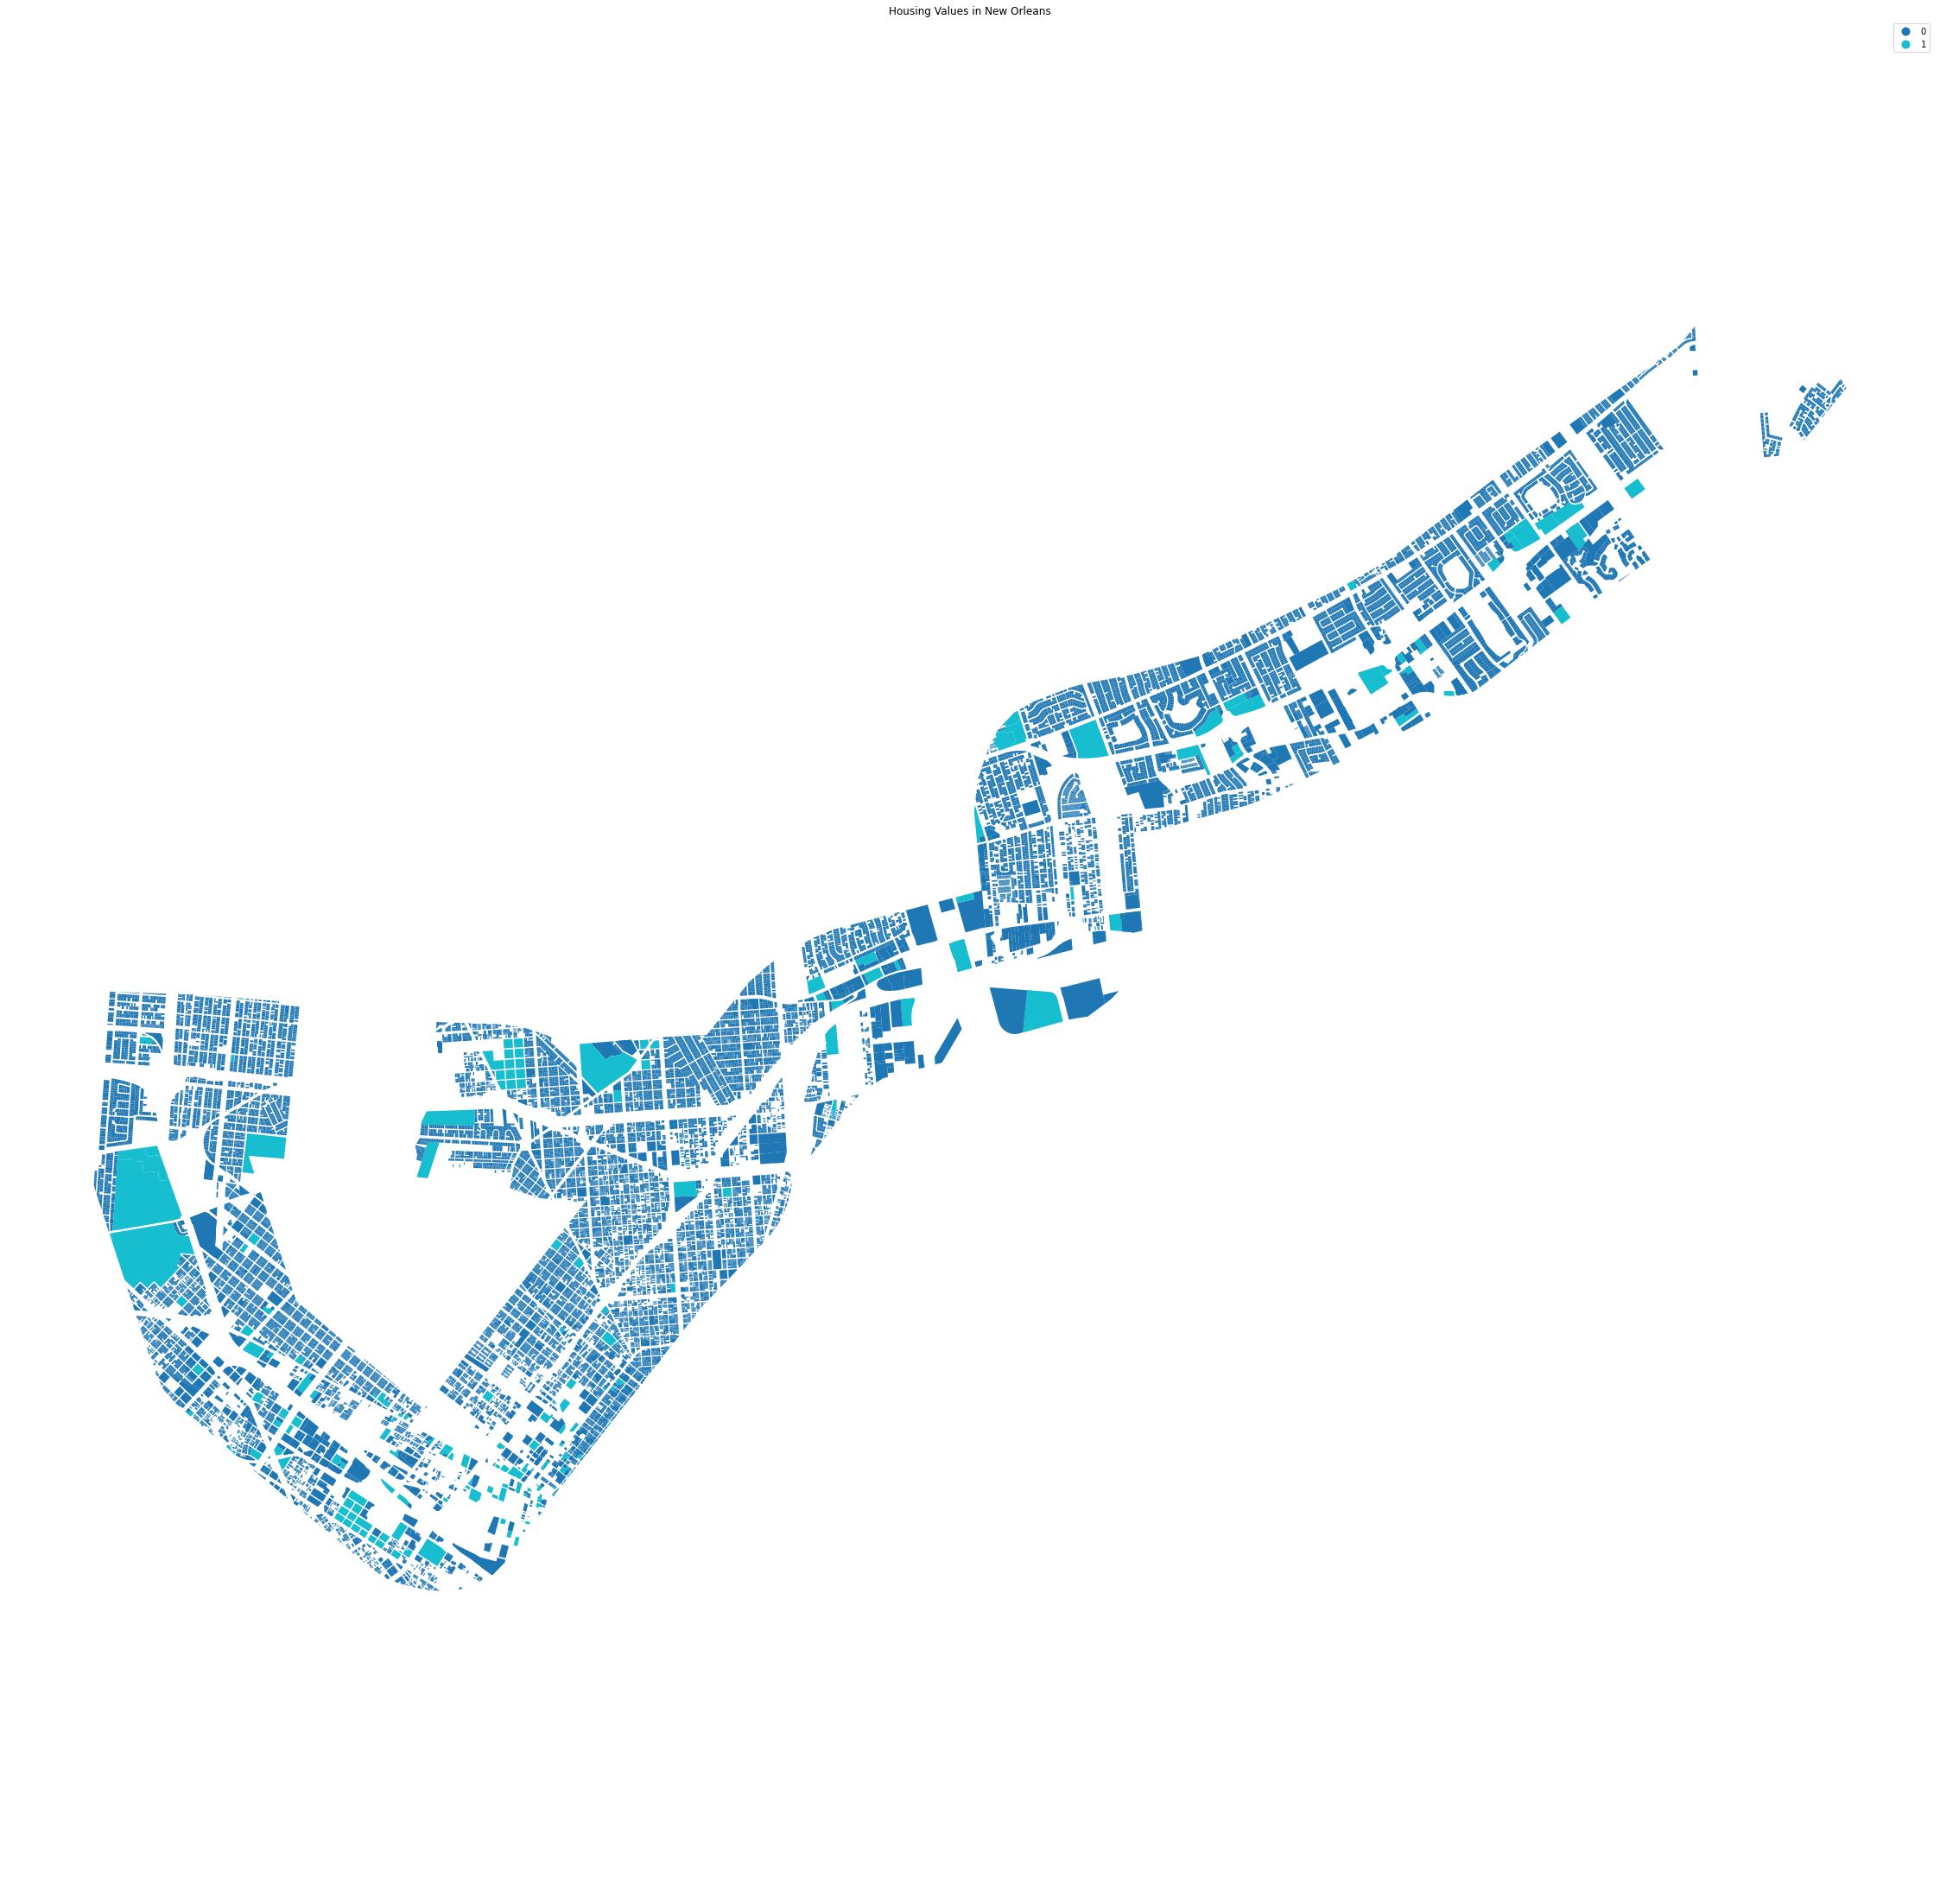

In [265]:
f, ax = plt.subplots(1, figsize=(40, 40))
df3.plot(column='k2cls', categorical=True, legend=True, linewidth=0, ax=ax)
ax.set_axis_off()
plt.axis('equal')
plt.title('Housing Values in New Orleans')
# Display the map
plt.show()

In [266]:
Values = ['Current_Assessed_Value']

In [267]:
# Name (index) the rows after the category they belong
to_plot = df3.set_index('k2cls')
# Subset to keep only variables used in K-means clustering
to_plot = to_plot[Values]
# Display top of the table
to_plot.head()

Current_Assessed_Value
k2cls                        
0                     41940.0
0                      6050.0
0                     10390.0
0                     10770.0
0                      6940.0

In [268]:
to_plot = to_plot.stack()
to_plot.head()

k2cls                        
0      Current_Assessed_Value    41940.0
       Current_Assessed_Value     6050.0
       Current_Assessed_Value    10390.0
       Current_Assessed_Value    10770.0
       Current_Assessed_Value     6940.0
dtype: float64

In [269]:
to_plot = to_plot.reset_index()
to_plot.head()

k2cls                 level_1        0
0      0  Current_Assessed_Value  41940.0
1      0  Current_Assessed_Value   6050.0
2      0  Current_Assessed_Value  10390.0
3      0  Current_Assessed_Value  10770.0
4      0  Current_Assessed_Value   6940.0

In [270]:
to_plot = to_plot.rename(columns={'level_1': 'Name', 0: 'Values'})
to_plot.head()

k2cls                    Name   Values
0      0  Current_Assessed_Value  41940.0
1      0  Current_Assessed_Value   6050.0
2      0  Current_Assessed_Value  10390.0
3      0  Current_Assessed_Value  10770.0
4      0  Current_Assessed_Value   6940.0

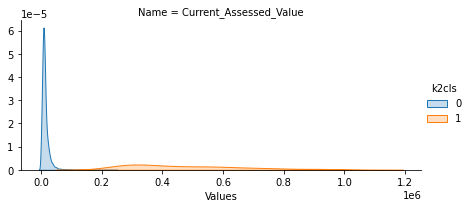

In [271]:
# Setup the facets
facets = sns.FacetGrid(data=to_plot, row='Name', hue='k2cls', \
                  sharey=False, sharex=False, aspect=2)
# Build the plot as a `sns.kdeplot`
_ = facets.map(sns.kdeplot, 'Values', shade=True).add_legend()

In [283]:
orley = Orley1000.dropna(subset=['Land_Value'])

In [284]:
orley['values_per_area'] = orley['Land_Value']/orley['Areas']

/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [285]:
y = orley['values_per_area'].values.reshape((-1,1))

In [286]:
np.random.seed(233)
k2cls = kmeans2.fit(y)

In [287]:
k2cls.labels_
orley['k2cls'] = k2cls.labels_

/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


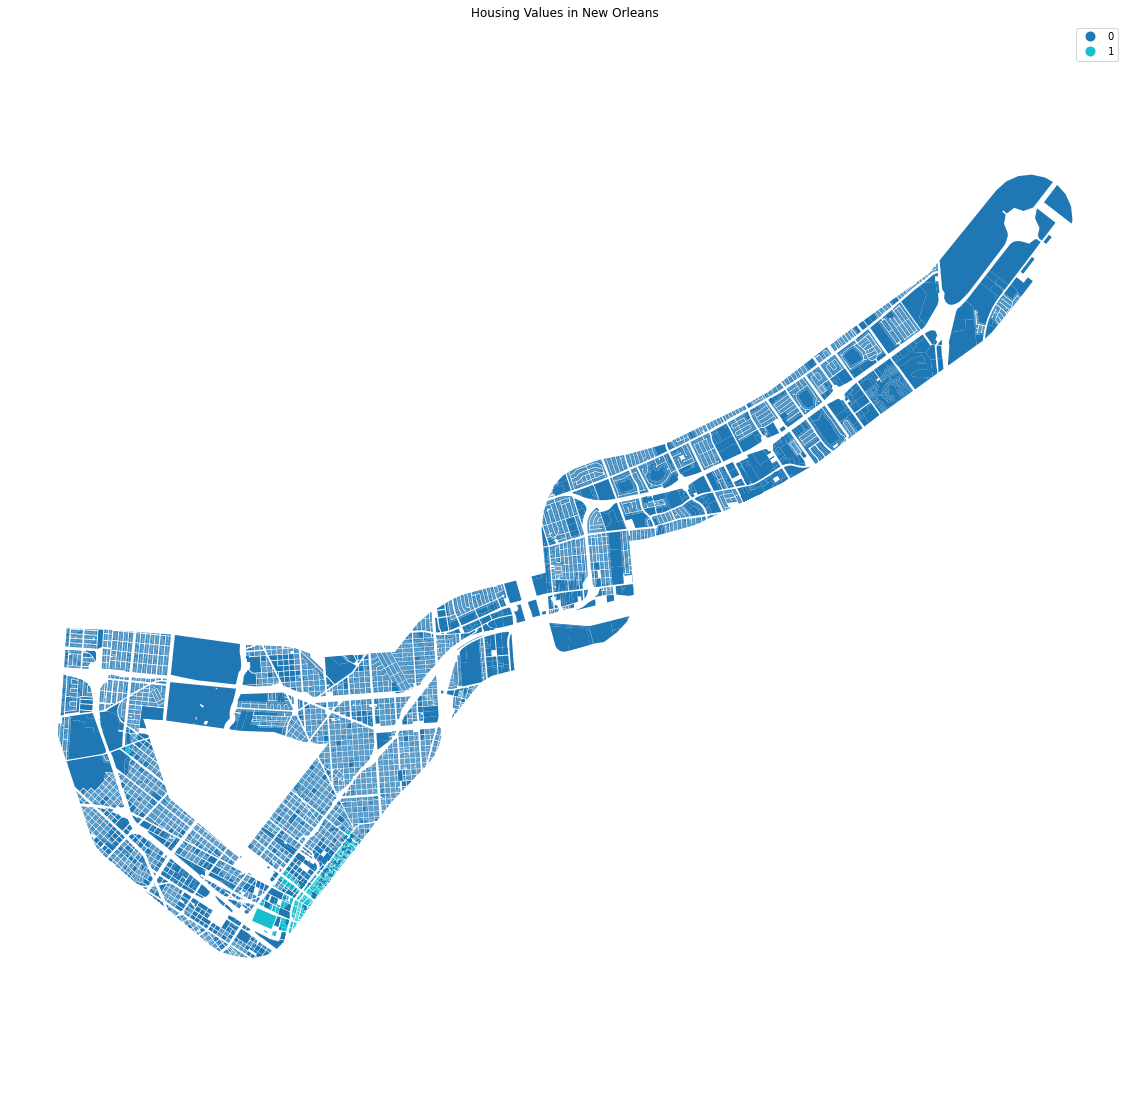

In [289]:
f, ax = plt.subplots(1, figsize=(20, 20))
orley.plot(column='k2cls', categorical=True, legend=True, linewidth=0, ax=ax)
ax.set_axis_off()
plt.axis('equal')
plt.title('Housing Values in New Orleans')
# Display the map
plt.show()

In [290]:
k2means = orley.groupby('k2cls')['values_per_area'].mean()
k2means.T

k2cls
0     5.274863
1    73.438937
Name: values_per_area, dtype: float64

In [291]:
np.random.seed(183)
k5cls = kmeans5.fit(y)
k5cls.labels_
orley['k5cls'] = k5cls.labels_

/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


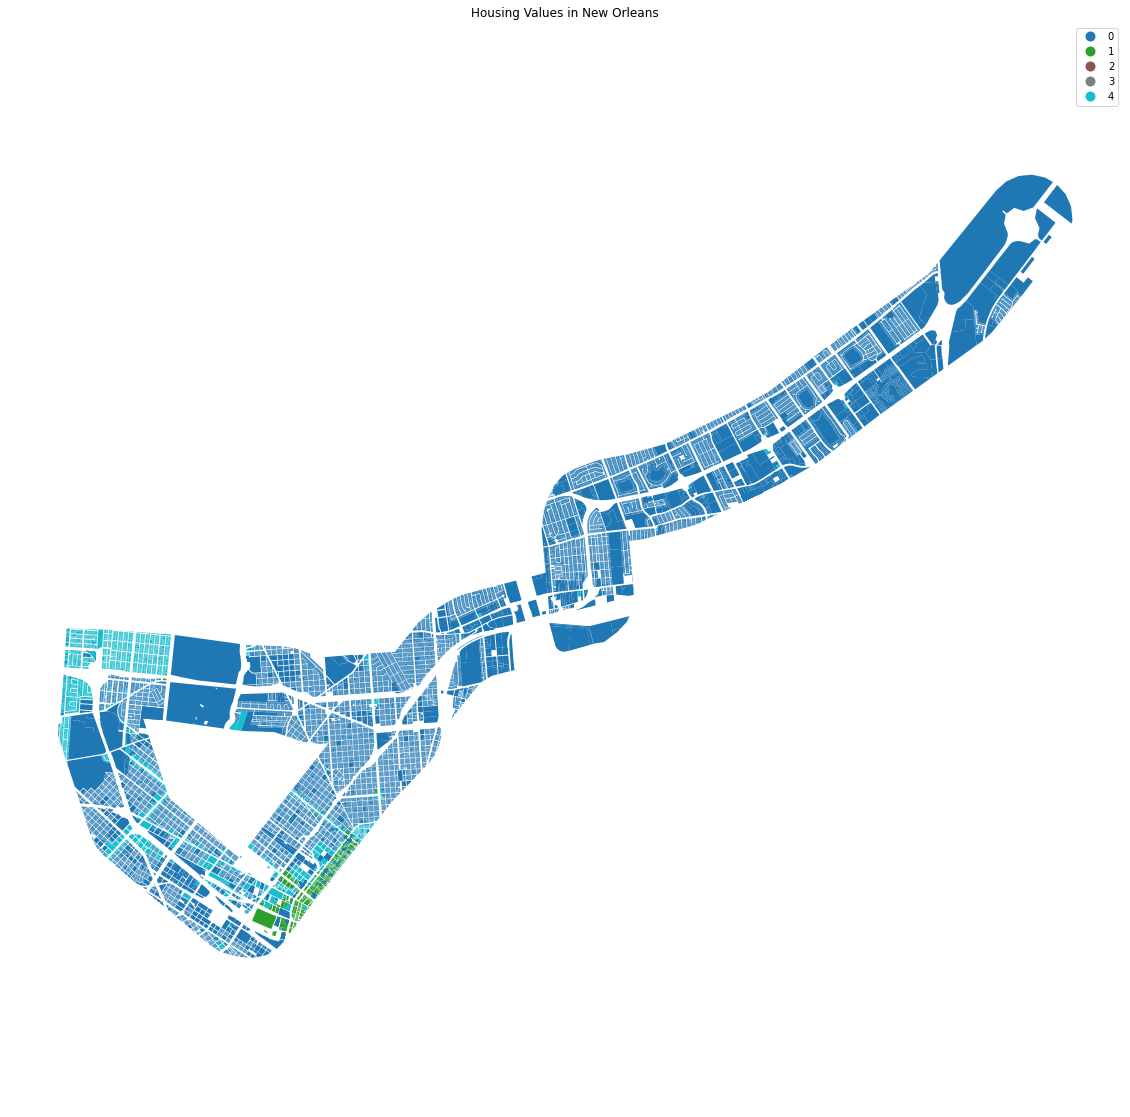

In [292]:
f, ax = plt.subplots(1, figsize=(20, 20))
orley.plot(column='k5cls', categorical=True, legend=True, linewidth=0, ax=ax)
ax.set_axis_off()
plt.axis('equal')
plt.title('Land Values in New Orleans')
# Display the map
plt.show()

In [294]:
k5means = orley.groupby('k5cls')['values_per_area'].mean()
k5means.T

k5cls
0       3.706109
1      68.958438
2    1339.427580
3     473.155597
4      20.375060
Name: values_per_area, dtype: float64

In [295]:
Values = ['values_per_area']

In [300]:
# Name (index) the rows after the category they belong
to_plot = orley.set_index('k5cls')
# Subset to keep only variables used in K-means clustering
to_plot = to_plot[Values]
# Display top of the table
to_plot.head()

values_per_area
k5cls                 
0             3.206383
0             4.221502
0             0.182034
0             0.662804
0             3.462840

In [301]:
to_plot = to_plot.stack()
to_plot.head()

k5cls                 
0      values_per_area    3.206383
       values_per_area    4.221502
       values_per_area    0.182034
       values_per_area    0.662804
       values_per_area    3.462840
dtype: float64

In [302]:
to_plot = to_plot.reset_index()
to_plot.head()

k5cls          level_1         0
0      0  values_per_area  3.206383
1      0  values_per_area  4.221502
2      0  values_per_area  0.182034
3      0  values_per_area  0.662804
4      0  values_per_area  3.462840

In [303]:
to_plot = to_plot.rename(columns={'level_1': 'Name', 0: 'Values'})
to_plot.head()

k5cls             Name    Values
0      0  values_per_area  3.206383
1      0  values_per_area  4.221502
2      0  values_per_area  0.182034
3      0  values_per_area  0.662804
4      0  values_per_area  3.462840

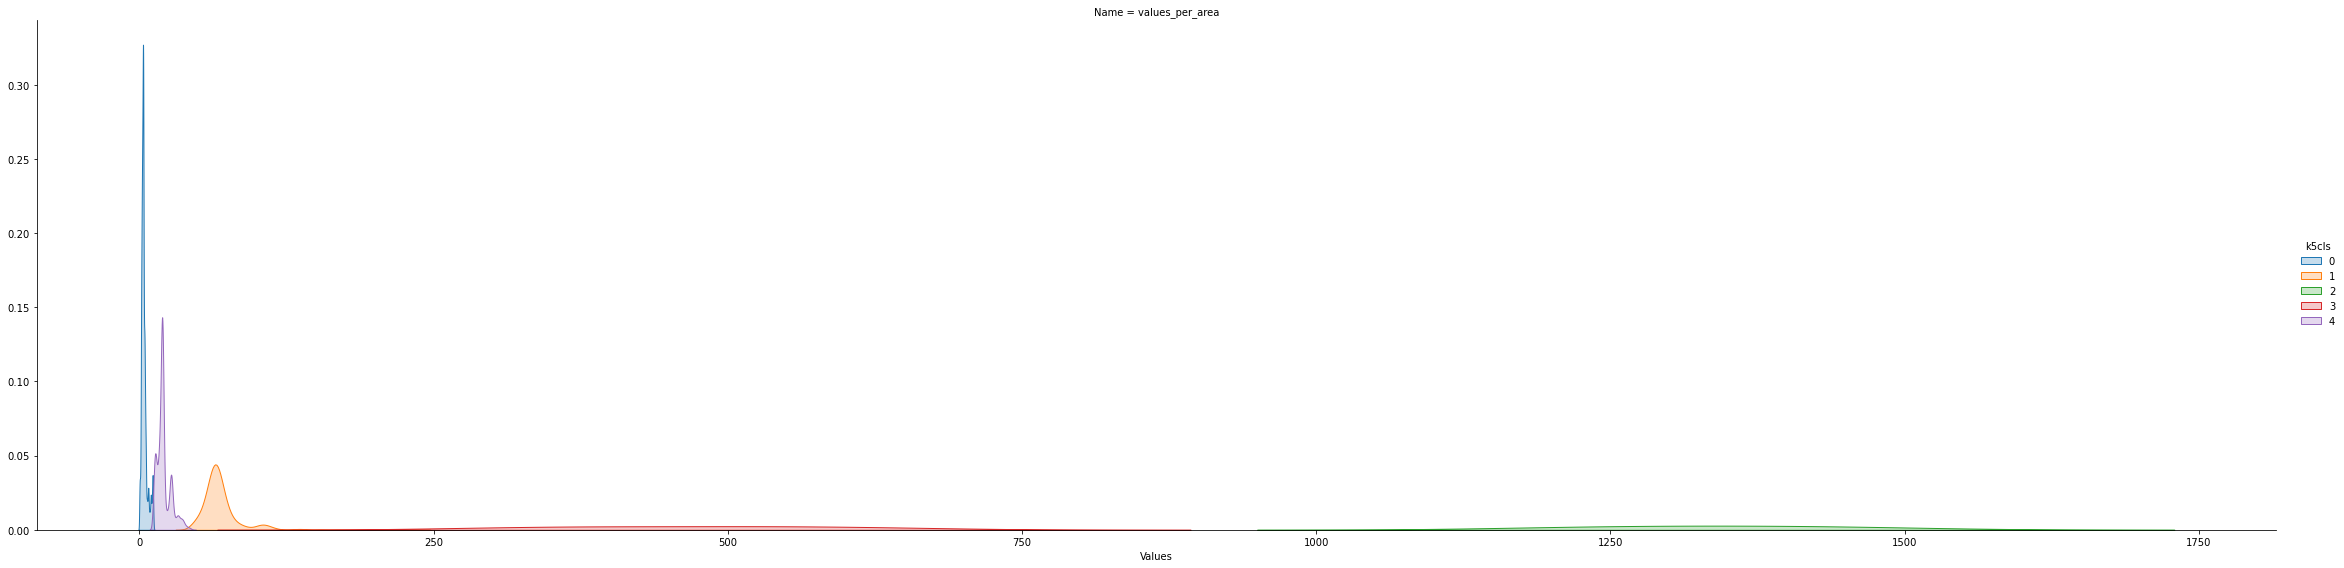

In [308]:
# Setup the facets
facets = sns.FacetGrid(data=to_plot, row='Name', hue='k5cls', \
                  sharey=False, sharex=False, aspect=4, height=8)
# Build the plot as a `sns.kdeplot`
_ = facets.map(sns.kdeplot, 'Values', shade=True).add_legend()

In [309]:
Miami = gp.read_file('Miami.geojson')

In [310]:
Miami.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 67492 entries, 0 to 67491
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   OBJECTID               67492 non-null  int64   
 1   PID                    67492 non-null  int64   
 2   FOLIO                  67492 non-null  object  
 3   TTRRSS                 67492 non-null  object  
 4   X_COORD                67492 non-null  float64 
 5   Y_COORD                67492 non-null  float64 
 6   TRUE_SITE_ADDR         65504 non-null  object  
 7   TRUE_SITE_UNIT         374 non-null    object  
 8   TRUE_SITE_CITY         67492 non-null  object  
 9   TRUE_SITE_ZIP_CODE     67223 non-null  object  
 10  TRUE_MAILING_ADDR1     66082 non-null  object  
 11  TRUE_MAILING_ADDR2     460 non-null    object  
 12  TRUE_MAILING_ADDR3     15 non-null     object  
 13  TRUE_MAILING_CITY      66082 non-null  object  
 14  TRUE_MAILING_STATE     66011 n

In [311]:
y = Miami['ASSESSED_VAL_CUR'].values.reshape((-1,1))

In [312]:
np.random.seed(279)
k5cls = kmeans5.fit(y)

In [313]:
k5cls.labels_
Miami['k5cls'] = k5cls.labels_

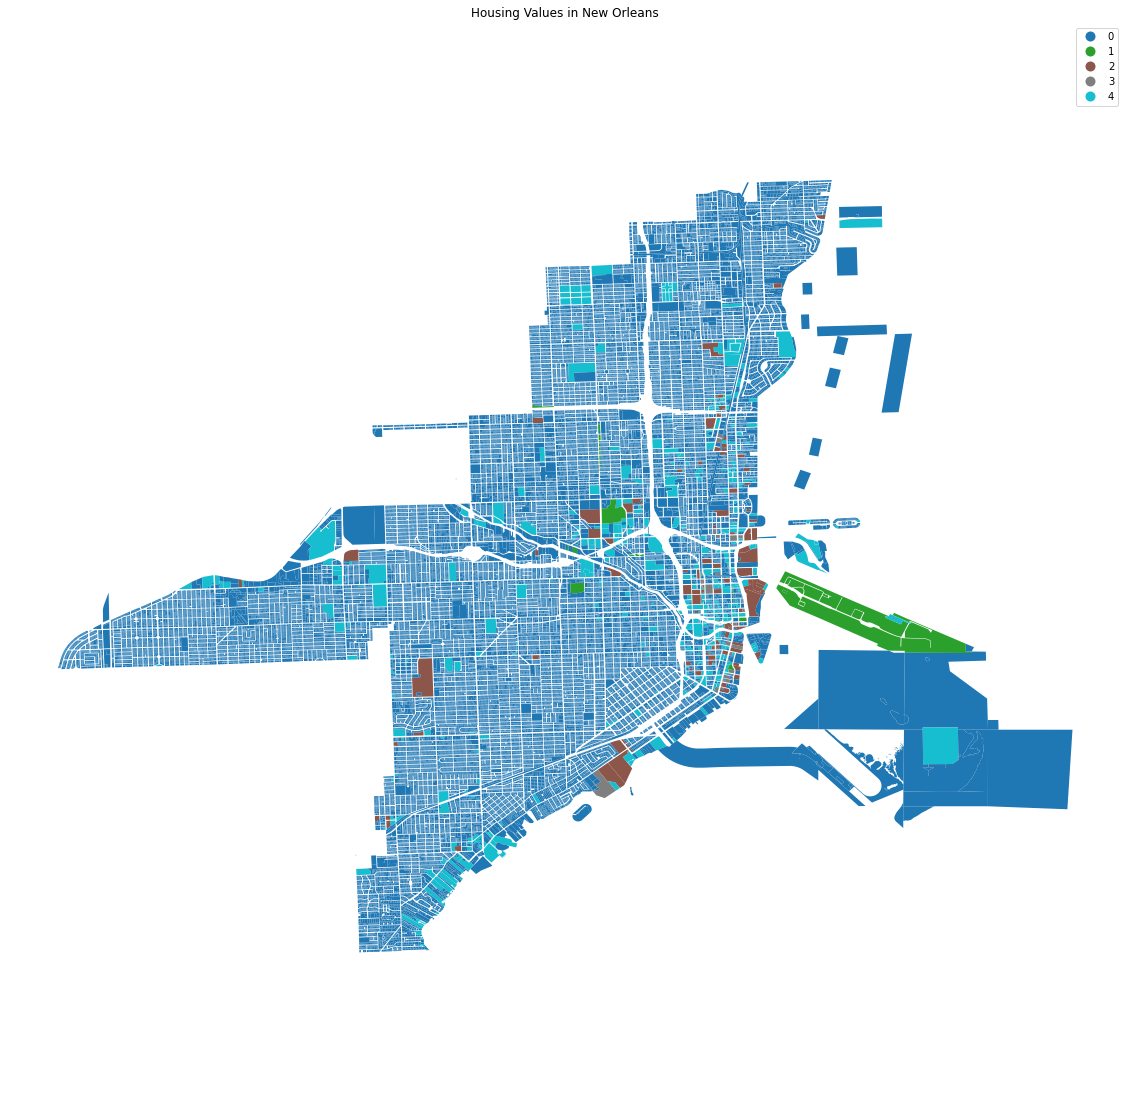

In [314]:
f, ax = plt.subplots(1, figsize=(20, 20))
Miami.plot(column='k5cls', categorical=True, legend=True, linewidth=0, ax=ax)
ax.set_axis_off()
plt.axis('equal')
plt.title('Housing Values in New Orleans')
# Display the map
plt.show()

In [315]:
k5means = Miami.groupby('k5cls')['ASSESSED_VAL_CUR'].mean()
k5means.T

k5cls
0    4.748013e+05
1    3.626704e+08
2    7.160536e+07
3    1.489094e+08
4    2.066366e+07
Name: ASSESSED_VAL_CUR, dtype: float64

In [318]:
Miami3 = gp.read_file('Miami300.geojson')

In [431]:
y = Miami3['ASSESSED_VAL_CUR'].values.reshape((-1,1))

In [323]:
kmeans3 = cluster.KMeans(n_clusters=3)

In [432]:
np.random.seed(279)
k5cls = kmeans5.fit(y)

In [433]:
k5cls.labels_
Miami3['k5cls'] = k5cls.labels_

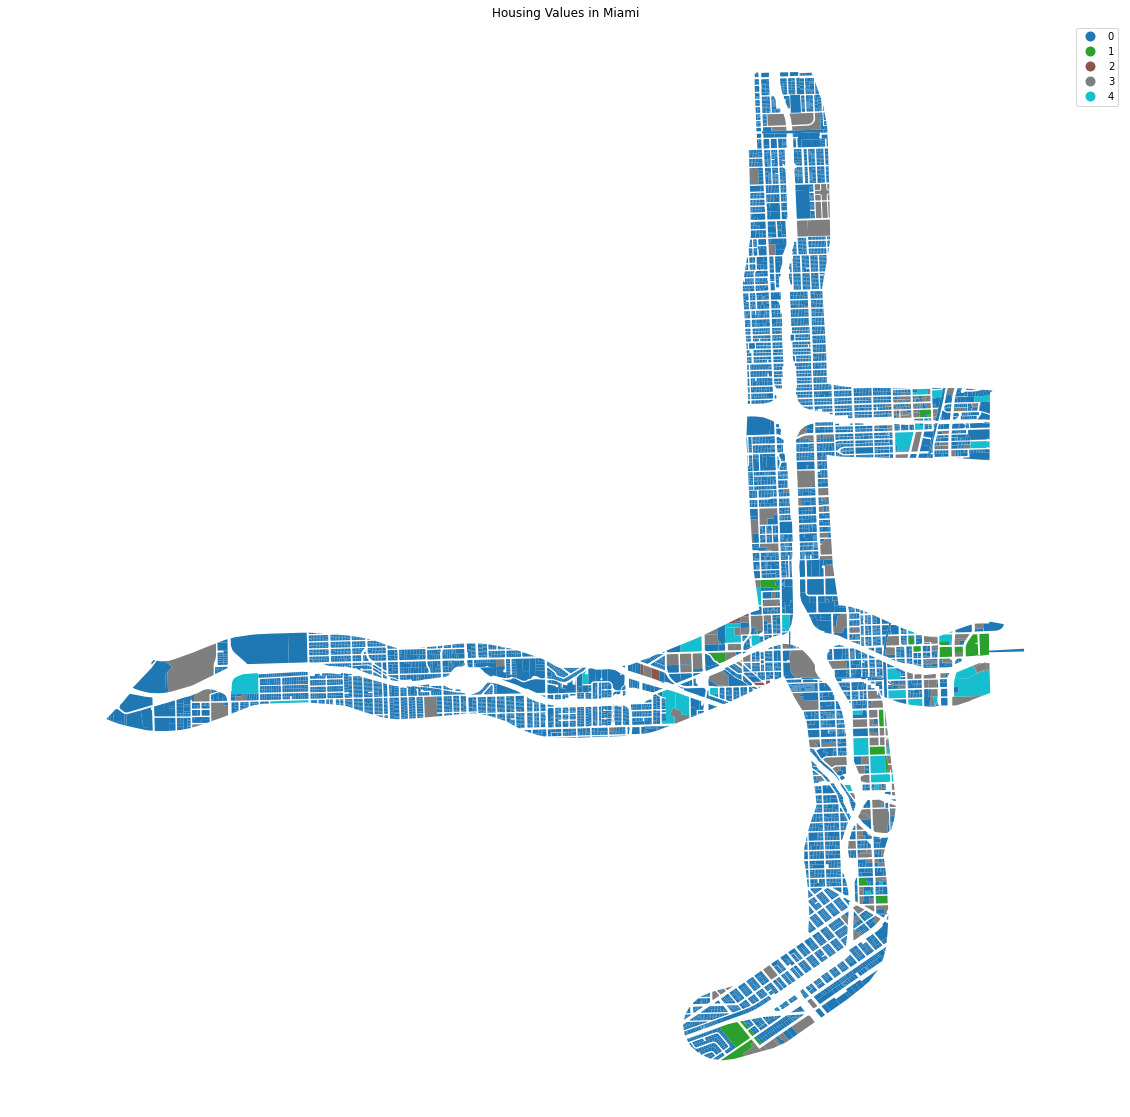

In [434]:
f, ax = plt.subplots(1, figsize=(20, 20))
Miami3.plot(column='k5cls', categorical=True, legend=True, linewidth=0, ax=ax)
ax.set_axis_off()
plt.axis('equal')
plt.title('Housing Values in Miami')
# Display the map
plt.show()

In [448]:
k5means = Miami3.groupby('k5cls')['ASSESSED_VAL_CUR'].mean()
k5means.T

k5cls
0    1.388846e+06
1    1.007000e+08
2    5.726667e+07
3    1.196000e+08
4    3.963066e+07
Name: ASSESSED_VAL_CUR, dtype: float64

In [442]:
Values = ['ASSESSED_VAL_CUR']

In [443]:
# Name (index) the rows after the category they belong
to_plot = Miami3.set_index('k5cls')
# Subset to keep only variables used in K-means clustering
to_plot = to_plot[Values]
# Display top of the table
to_plot.head()

ASSESSED_VAL_CUR
k5cls                  
0                193438
0                241198
0                335631
0                278420
0                337448

In [444]:
to_plot = to_plot.stack()
to_plot.head()

k5cls                  
0      ASSESSED_VAL_CUR    193438
       ASSESSED_VAL_CUR    241198
       ASSESSED_VAL_CUR    335631
       ASSESSED_VAL_CUR    278420
       ASSESSED_VAL_CUR    337448
dtype: int64

In [445]:
to_plot = to_plot.reset_index()
to_plot.head()

k5cls           level_1       0
0      0  ASSESSED_VAL_CUR  193438
1      0  ASSESSED_VAL_CUR  241198
2      0  ASSESSED_VAL_CUR  335631
3      0  ASSESSED_VAL_CUR  278420
4      0  ASSESSED_VAL_CUR  337448

In [446]:
to_plot = to_plot.rename(columns={'level_1': 'Name', 0: 'Values'})
to_plot.head()

k5cls              Name  Values
0      0  ASSESSED_VAL_CUR  193438
1      0  ASSESSED_VAL_CUR  241198
2      0  ASSESSED_VAL_CUR  335631
3      0  ASSESSED_VAL_CUR  278420
4      0  ASSESSED_VAL_CUR  337448

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


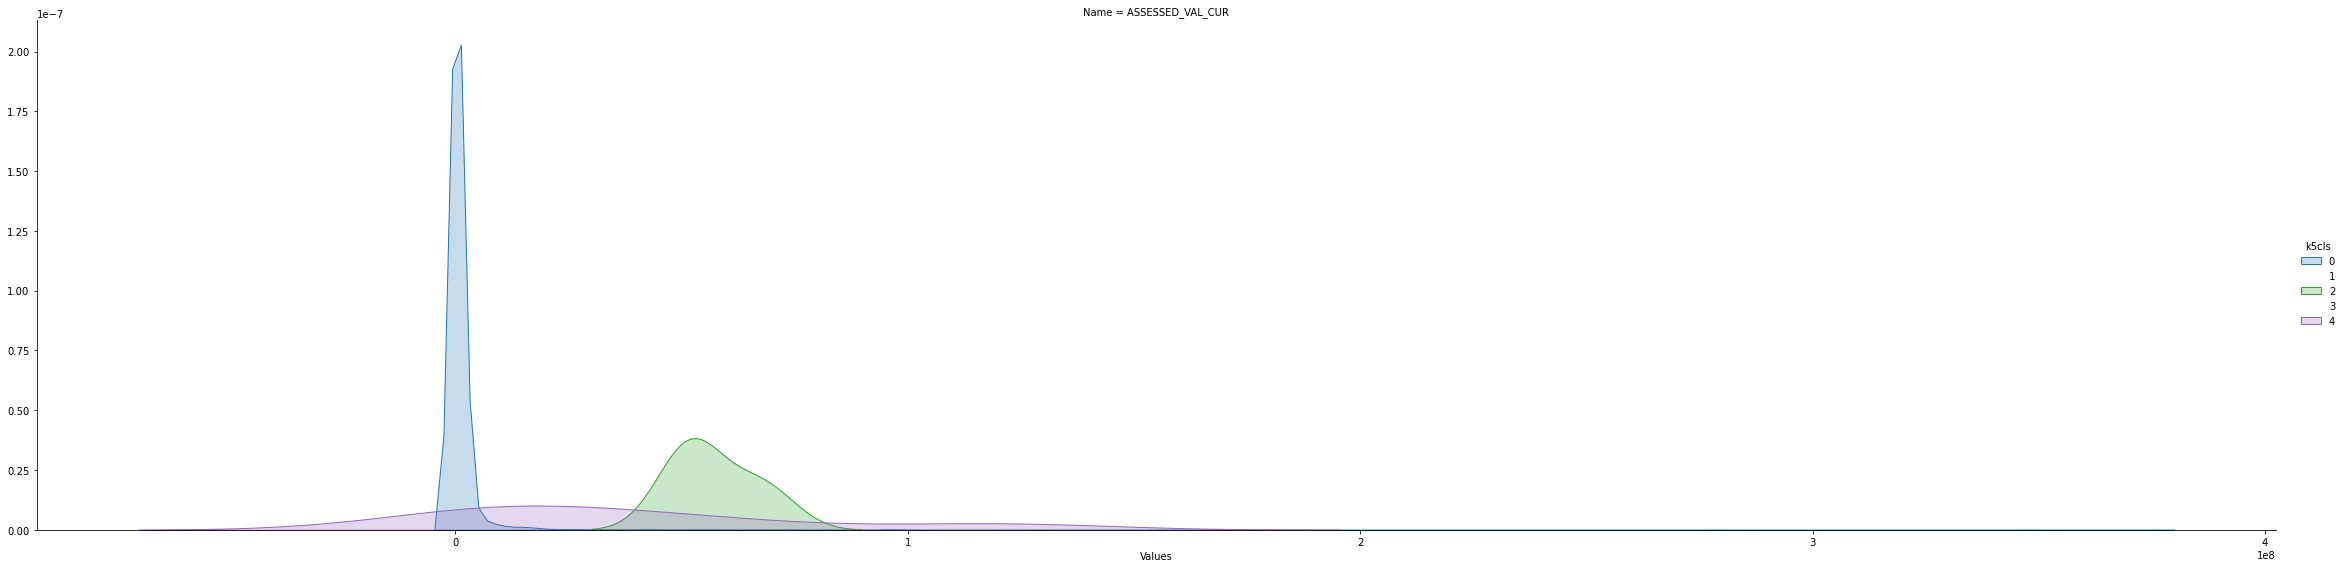

In [447]:
# Setup the facets
facets = sns.FacetGrid(data=to_plot, row='Name', hue='k5cls', \
                  sharey=False, sharex=False, aspect=4, height=8)
# Build the plot as a `sns.kdeplot`
_ = facets.map(sns.kdeplot, 'Values', shade=True).add_legend()

In [332]:
Miami3['Value/Area'] = Miami3['ASSESSED_VAL_CUR']/Miami3['Shape__Area']

In [331]:
Miami3.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 10497 entries, 0 to 10496
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   OBJECTID               10497 non-null  int64   
 1   PID                    10497 non-null  int64   
 2   FOLIO                  10497 non-null  object  
 3   TTRRSS                 10497 non-null  object  
 4   X_COORD                10497 non-null  float64 
 5   Y_COORD                10497 non-null  float64 
 6   TRUE_SITE_ADDR         10117 non-null  object  
 7   TRUE_SITE_UNIT         57 non-null     object  
 8   TRUE_SITE_CITY         10497 non-null  object  
 9   TRUE_SITE_ZIP_CODE     10441 non-null  object  
 10  TRUE_MAILING_ADDR1     10306 non-null  object  
 11  TRUE_MAILING_ADDR2     129 non-null    object  
 12  TRUE_MAILING_ADDR3     1 non-null      object  
 13  TRUE_MAILING_CITY      10306 non-null  object  
 14  TRUE_MAILING_STATE     10299 n

In [436]:
y = Miami3['Value/Area'].values.reshape((-1,1))
np.random.seed(279)
k5cls = kmeans5.fit(y)
k5cls.labels_
Miami3['k5cls'] = k5cls.labels_

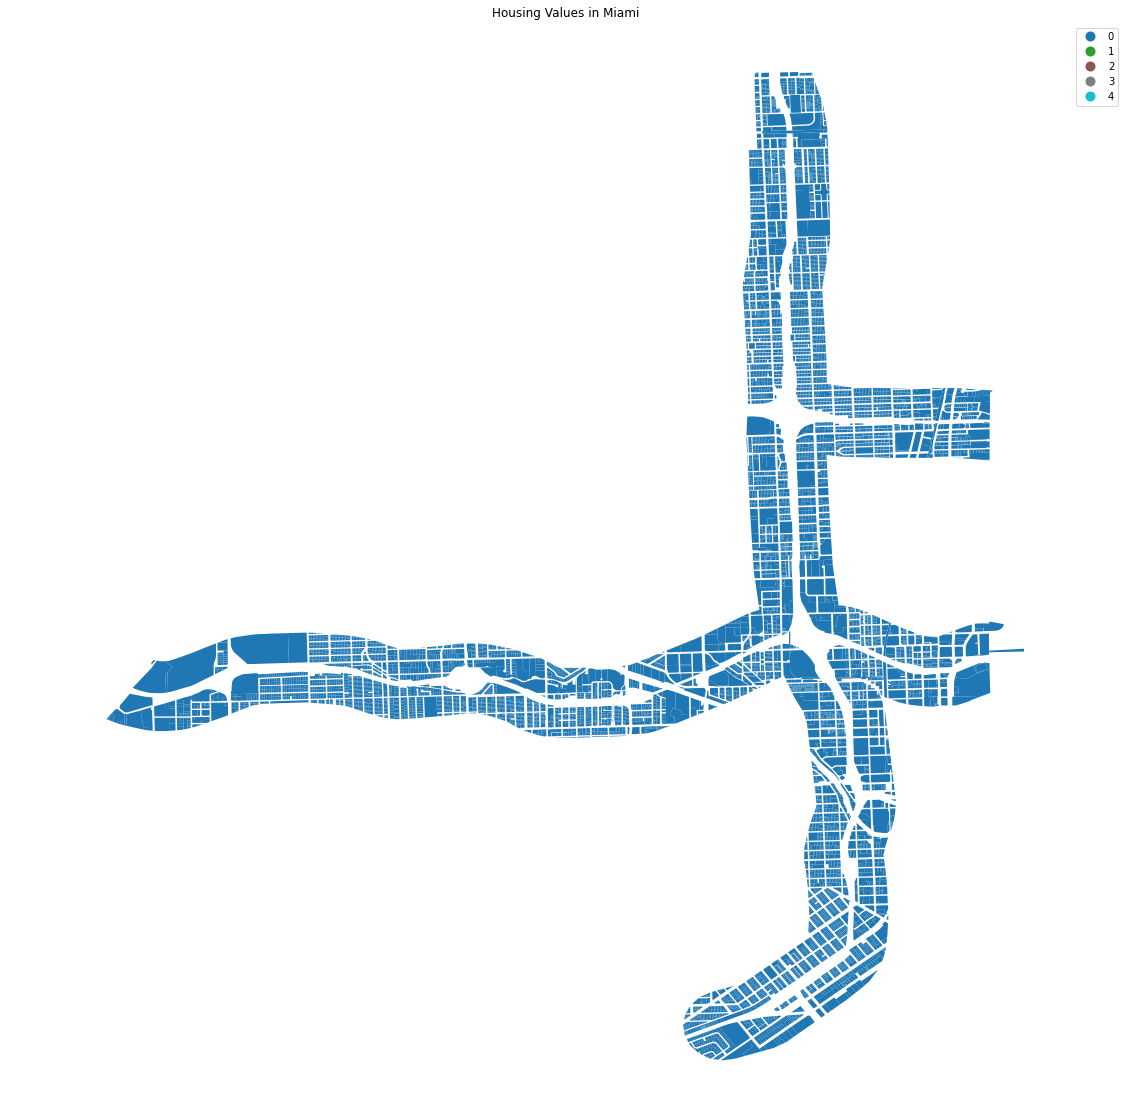

In [437]:
f, ax = plt.subplots(1, figsize=(20, 20))
Miami3.plot(column='k5cls', categorical=True, legend=True, linewidth=0, ax=ax)
ax.set_axis_off()
plt.axis('equal')
plt.title('Housing Values in Miami')
# Display the map
plt.show()

In [338]:
dups_shape = Miami3.pivot_table(columns=['k2cls'], aggfunc='size')
print(dups_shape)

k2cls
0    10493
1        4
dtype: int64


In [346]:
Atlanta = gp.read_file('Atlanta.geojson')

In [347]:
Atlanta.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 362654 entries, 0 to 362653
Data columns (total 35 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   OBJECTID       362654 non-null  int64   
 1   ParcelID       362654 non-null  object  
 2   TaxYear        361648 non-null  float64 
 3   Address        362654 non-null  object  
 4   AddrNumber     361605 non-null  object  
 5   AddrPreDir     316 non-null     object  
 6   AddrStreet     361644 non-null  object  
 7   AddrSuffix     339100 non-null  object  
 8   AddrPosDir     136711 non-null  object  
 9   AddrUntTyp     39889 non-null   object  
 10  AddrUnit       51660 non-null   object  
 11  Owner          361647 non-null  object  
 12  OwnerAddr1     361603 non-null  object  
 13  OwnerAddr2     360551 non-null  object  
 14  TaxDist        361648 non-null  object  
 15  TotAssess      360400 non-null  float64 
 16  LandAssess     360400 non-null  float64 
 17  Im

In [349]:
Atlanta[['OwnerAddr2']].head()

OwnerAddr2
0       ALPHARETTA GA 30009
1  ALPHARETTA GA 30004-1483
2       ALPHARETTA GA 30009
3       ALPHARETTA GA 30009
4       ALPHARETTA GA 30004

In [350]:
#The entire area of Georgia is within the file, and there are no direct column for cities, therefore we need to use adress for distinction
Atlanta['OwnerAddr2'] = Atlanta['OwnerAddr2'].str.replace('\d+', '')

<ipython-input-350-7d8231f71f41>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  Atlanta['OwnerAddr2'] = Atlanta['OwnerAddr2'].str.replace('\d+', '')


In [364]:
Atlanta[['OwnerAddr2']].tail()

OwnerAddr2
362649       None
362650       None
362651       None
362652       None
362653       None

In [365]:
atlanta = (Atlanta['OwnerAddr2'] == 'ATLANTA GA ')

In [366]:
atlanta.head()

0    False
1    False
2    False
3    False
4    False
Name: OwnerAddr2, dtype: bool

In [367]:
AT = Atlanta[atlanta]

In [375]:
AT = AT.dropna(subset=['TotAssess'])

In [376]:
AT.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 156635 entries, 0 to 156939
Data columns (total 36 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   index          156635 non-null  int64   
 1   OBJECTID       156635 non-null  int64   
 2   ParcelID       156635 non-null  object  
 3   TaxYear        156635 non-null  float64 
 4   Address        156635 non-null  object  
 5   AddrNumber     156618 non-null  object  
 6   AddrPreDir     124 non-null     object  
 7   AddrStreet     156634 non-null  object  
 8   AddrSuffix     150105 non-null  object  
 9   AddrPosDir     99391 non-null   object  
 10  AddrUntTyp     25197 non-null   object  
 11  AddrUnit       32028 non-null   object  
 12  Owner          156635 non-null  object  
 13  OwnerAddr1     156634 non-null  object  
 14  OwnerAddr2     156635 non-null  object  
 15  TaxDist        156635 non-null  object  
 16  TotAssess      156635 non-null  float64 
 17  La

In [377]:
y = AT['TotAssess'].values.reshape((-1,1))

In [378]:
#AT = AT.reset_index()

In [379]:
np.random.seed(279)
k2cls = kmeans2.fit(y)

In [380]:
k2cls.labels_
AT['k2cls'] = k2cls.labels_

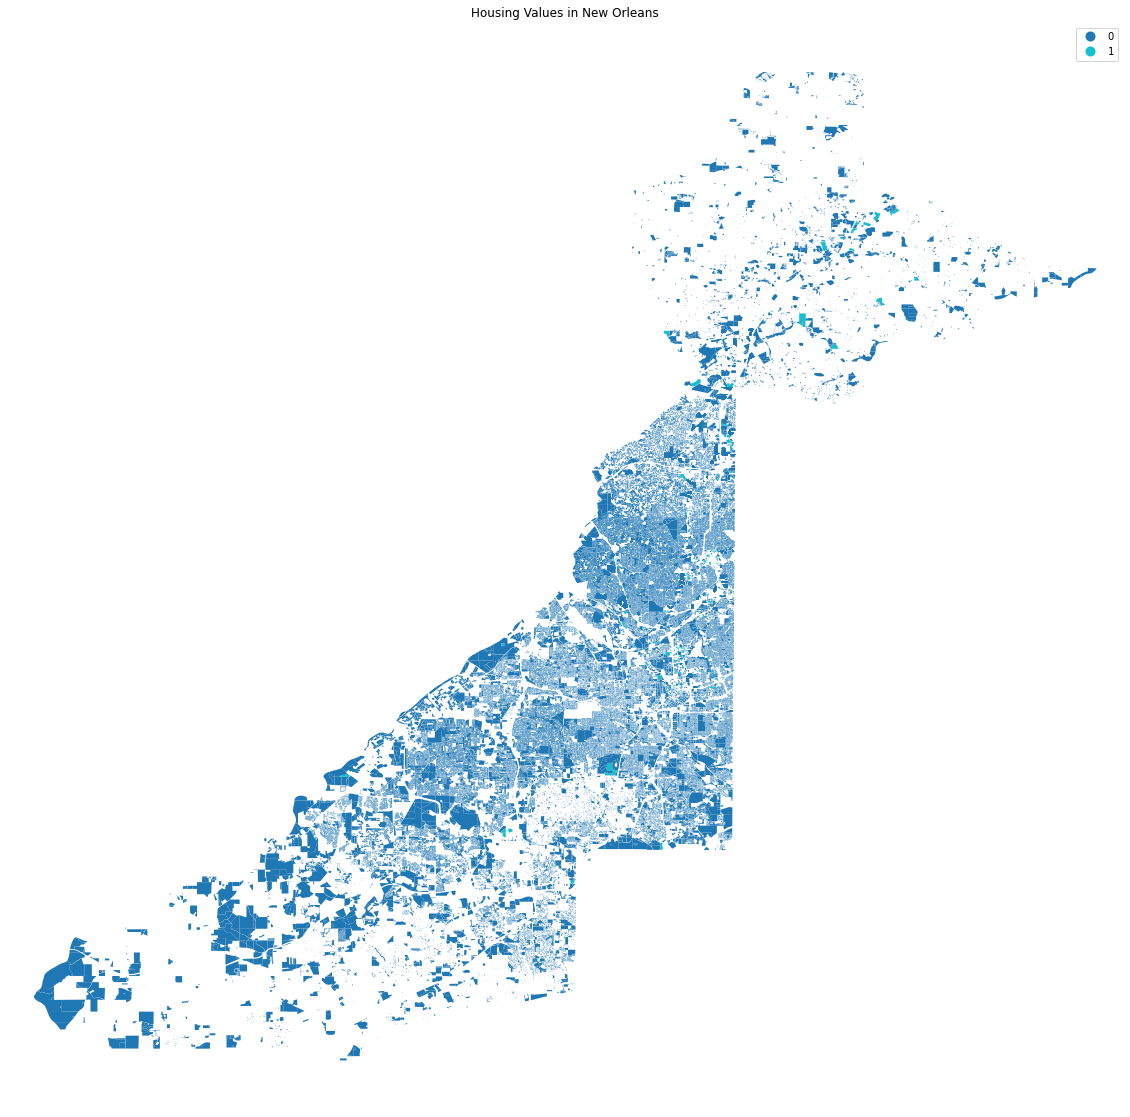

In [382]:
f, ax = plt.subplots(1, figsize=(20, 20))
AT.plot(column='k2cls', categorical=True, legend=True, linewidth=0, ax=ax)
ax.set_axis_off()
plt.axis('equal')
plt.title('Housing Values in Atlanta')  
# Display the map
plt.show()

In [383]:
at500 = gp.read_file('AT500.geojson')

In [384]:
at500[['OwnerAddr2']].head()

OwnerAddr2
0  MAMMOTH LAKES CA 93546-4054
1             REDMOND WA 98052
2          ALPHARETTA GA 30004
3          ALPHARETTA GA 30009
4          ALPHARETTA GA 30009

In [385]:
at500['OwnerAddr2'] = at500['OwnerAddr2'].str.replace('\d+', '')

<ipython-input-385-a5c442d0695b>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  at500['OwnerAddr2'] = at500['OwnerAddr2'].str.replace('\d+', '')


In [386]:
atlanta = (at500['OwnerAddr2'] == 'ATLANTA GA ')

In [387]:
AT500 = at500[atlanta]

In [408]:
AT500 = AT500.dropna(subset=['TotAppr'])
AT500 = AT500.dropna(subset=['LandAcres'])

In [409]:
AT500['values_per_area'] = AT500['TotAppr']/AT500['LandAcres']

In [450]:
y = AT500['values_per_area'].values.reshape((-1,1))

In [451]:
np.random.seed(252)
k5cls = kmeans5.fit(y)

In [452]:
k5cls.labels_
AT500['k5cls'] = k5cls.labels_

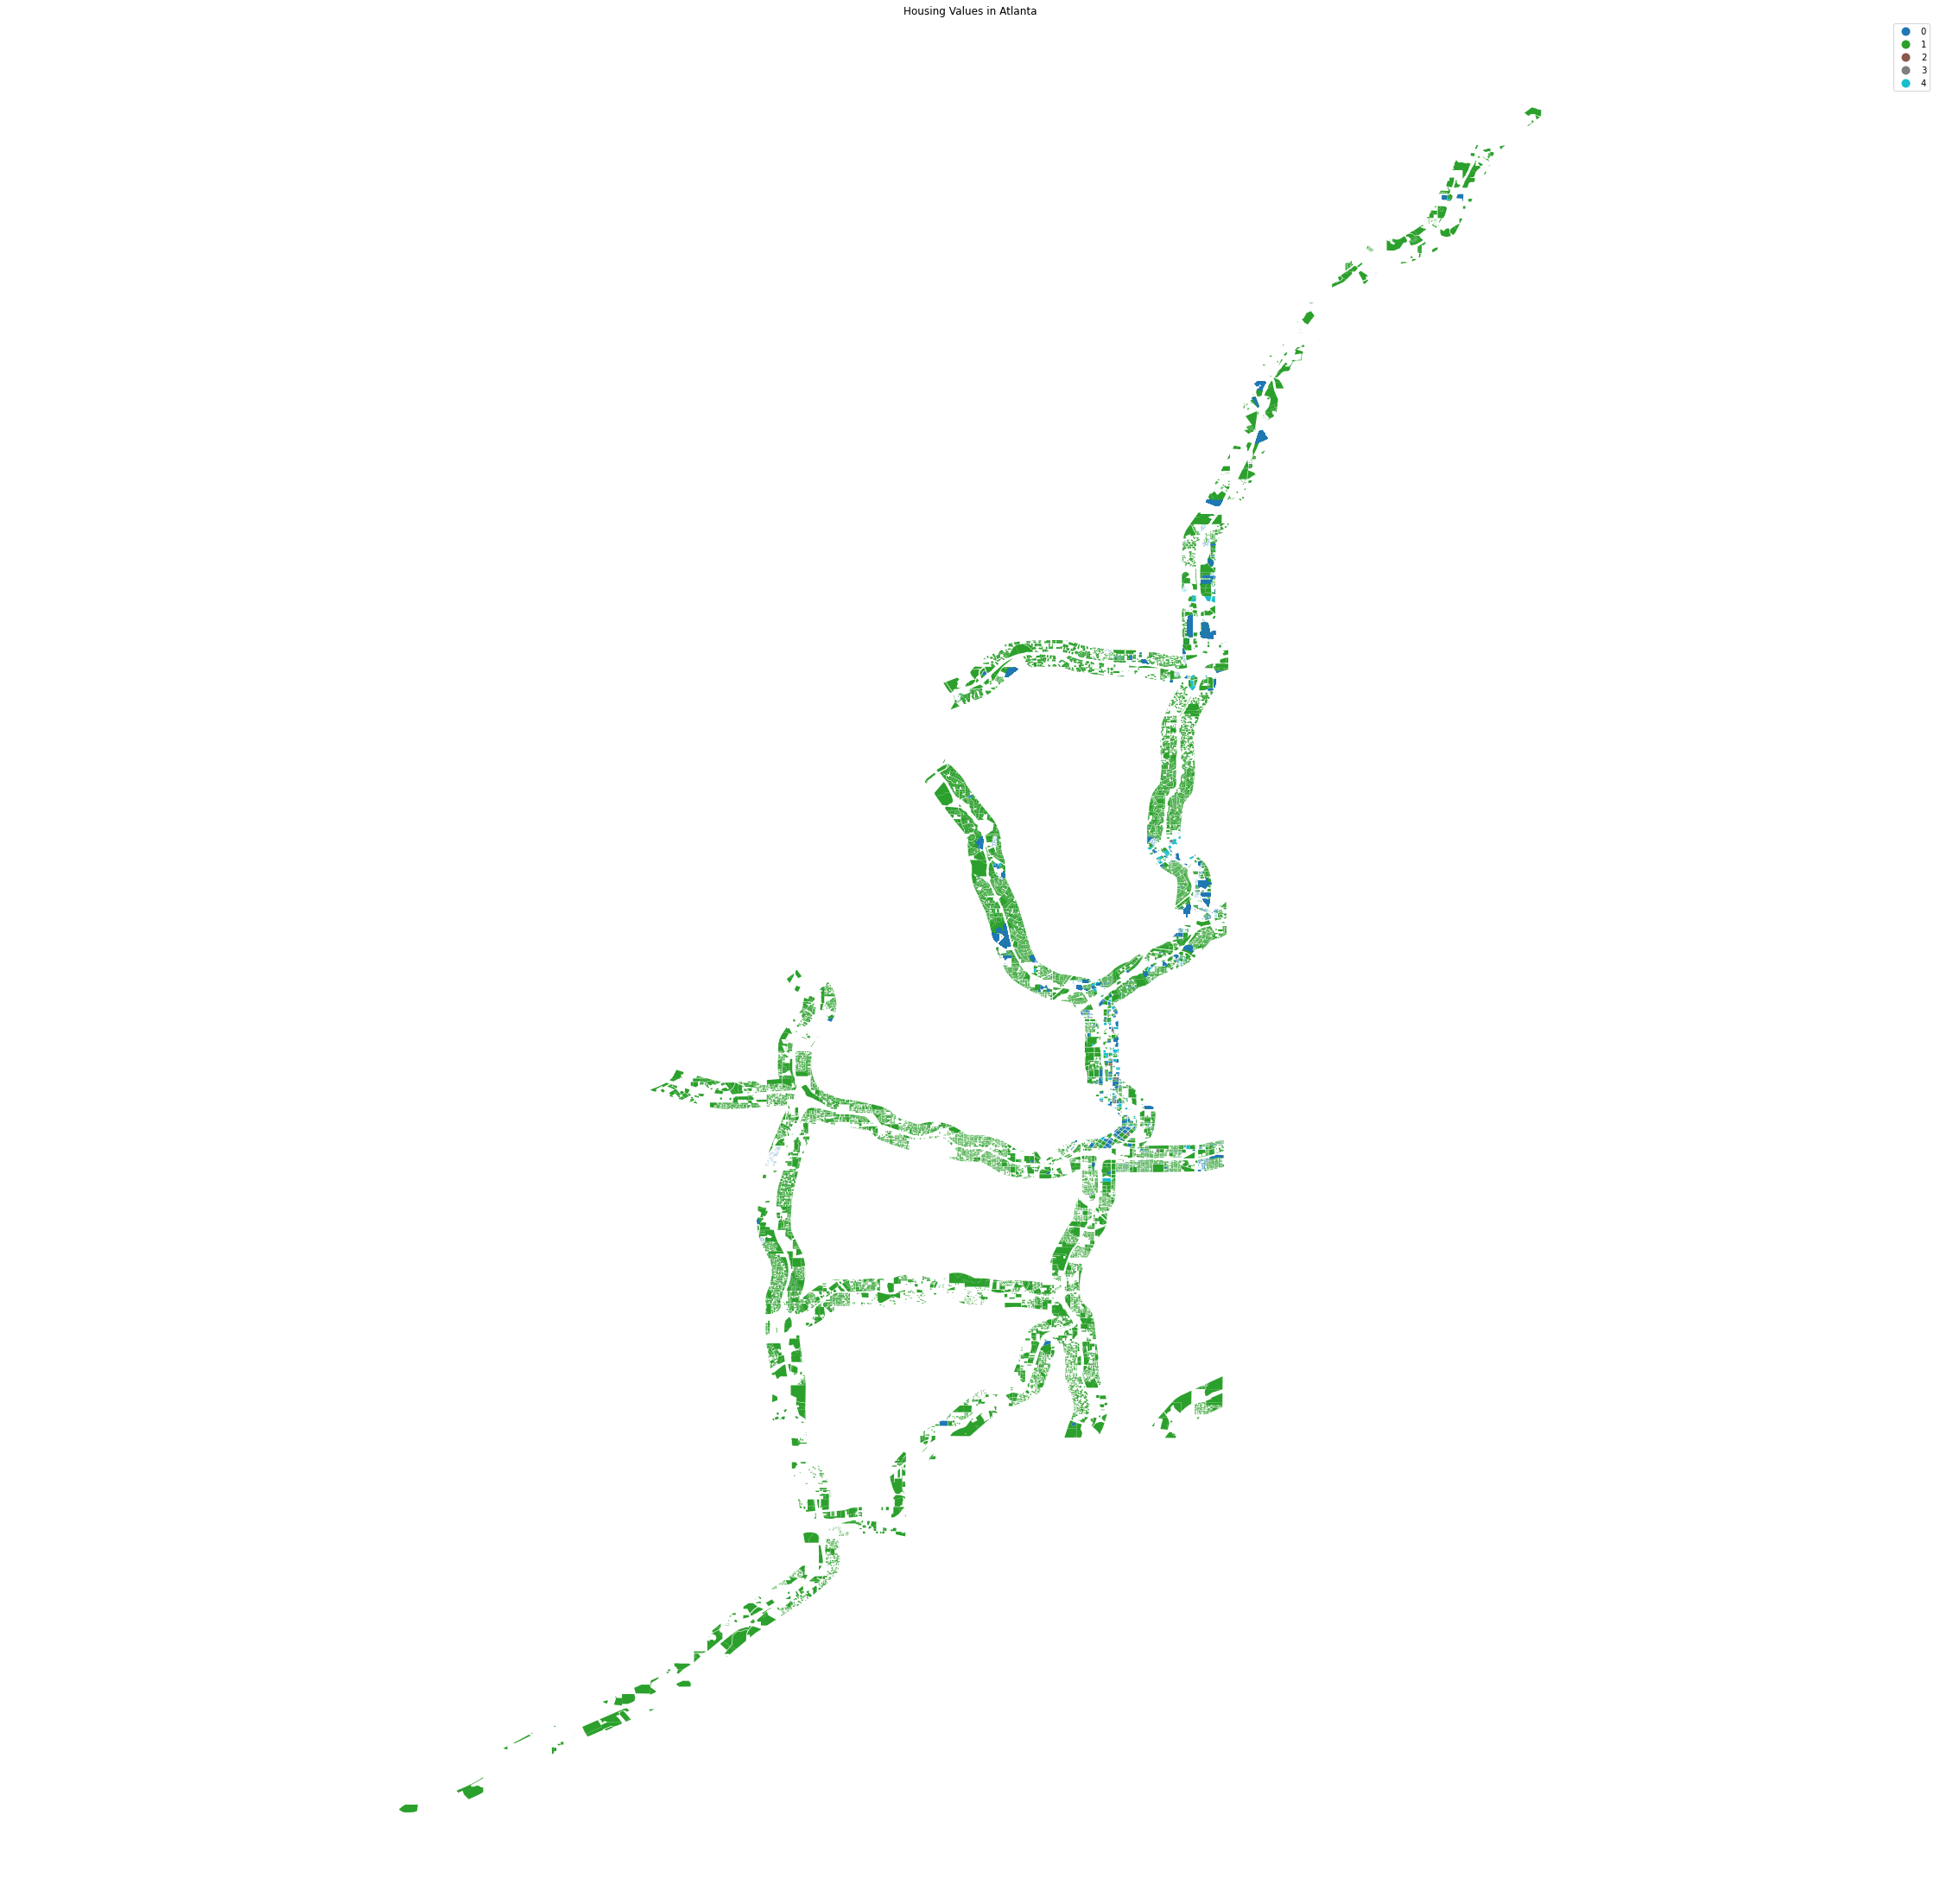

In [457]:
f, ax = plt.subplots(1, figsize=(40, 40))
AT500.plot(column='k5cls', categorical=True, legend=True, linewidth=0, ax=ax)
ax.set_axis_off()
plt.axis('equal')
plt.title('Housing Values in Atlanta')  
# Display the map
plt.show()

In [454]:
dups_shape = AT500.pivot_table(columns=['k5cls'], aggfunc='size')
print(dups_shape)

k5cls
0    12562
1    20379
2        1
3       22
4     1689
dtype: int64


In [456]:
k5means = AT500.groupby('k5cls')['values_per_area'].mean()
k5means.T

k5cls
0    9.841623e+06
1    1.424162e+06
2    8.066322e+08
3    1.248096e+08
4    2.297543e+07
Name: values_per_area, dtype: float64

In [461]:
Values = ['values_per_area']

In [462]:
to_plot = AT500.set_index('k5cls')

to_plot = to_plot[Values]

to_plot.head()

values_per_area
k5cls                 
1         7.200000e+05
1         4.133690e+06
1         4.133690e+06
1         4.133690e+06
1         5.241791e+06

In [463]:
to_plot = to_plot.stack()
to_plot.head()

k5cls                 
1      values_per_area    7.200000e+05
       values_per_area    4.133690e+06
       values_per_area    4.133690e+06
       values_per_area    4.133690e+06
       values_per_area    5.241791e+06
dtype: float64

In [464]:
to_plot = to_plot.reset_index()
to_plot.head()

k5cls          level_1             0
0      1  values_per_area  7.200000e+05
1      1  values_per_area  4.133690e+06
2      1  values_per_area  4.133690e+06
3      1  values_per_area  4.133690e+06
4      1  values_per_area  5.241791e+06

In [465]:
to_plot = to_plot.rename(columns={'level_1': 'Name', 0: 'Values'})
to_plot.head()

k5cls             Name        Values
0      1  values_per_area  7.200000e+05
1      1  values_per_area  4.133690e+06
2      1  values_per_area  4.133690e+06
3      1  values_per_area  4.133690e+06
4      1  values_per_area  5.241791e+06

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


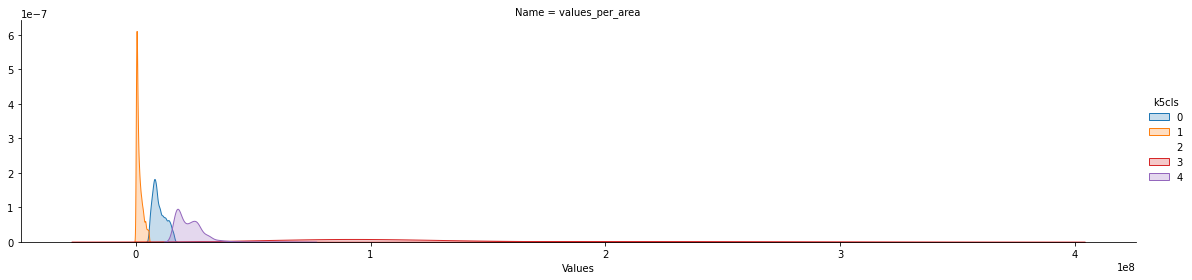

In [466]:
# Setup the facets
facets = sns.FacetGrid(data=to_plot, row='Name', hue='k5cls', \
                  sharey=False, sharex=False, aspect=4, height=4)
# Build the plot as a `sns.kdeplot`
_ = facets.map(sns.kdeplot, 'Values', shade=True).add_legend()